# Project : PRCP-1017-AutoPricePred

# Table of contents

• Importing Necessary Libraries
• Load Datasets
• Exploratory Data Analysis
• Data Preprocessing
• Feature Selection
• Model Implementation
• Model Evaluation
• Model Comparison Report
• Challenges Faced Report
• Conclusion

Domain Analysis:
    
The project falls within the domain of automotive industry analytics, focusing on analyzing various attributes of vehicles,
possibly for tasks such as predicting car prices, evaluating car performance, or categorizing vehicles based on features.

An automobile car price prediction system offers consumers the ability toforecast car prices accurately before making 
a purchase, facilitatinginformed decision-making and enhancing budget planning.

Implementation of such a tool can empower car buyers to make wellinformed decisions, optimize savings, and reduce
uncertainty associated with price negotiation.

Additionally, automotive dealerships and manufacturers can leverage this technology to improve pricing strategies, optimize 
inventory management,and enhance customer satisfaction.By dynamically adjusting pricing strategies based on predictive
insights,dealerships can maximize revenue and profitability while maintaining competitiveness in the market.

Overall, an automobile car price prediction system represents a valuable asset for both consumers and automotive businesses
,facilitating efficiency and transparency in the car purchasing process.

Key Attributes:
Car Specifications: Engine type, body style, drive wheels, fuel type.
Performance Metrics: Horsepower, RPM, fuel efficiency.
Physical Dimensions: Length, width, height, curb weight.
Economic Factors: Price, fuel economy (mileage).
    
Potential Use Cases:
Price Prediction: Using attributes to predict the market price of vehicles.
Vehicle Categorization: Classifying cars into categories like economy, luxury, sports, etc.
Market Analysis: Identifying trends in car features and performance over time

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('auto_imports.csv')
pd.set_option("display.max_columns",None)

In [3]:
df

3    ?  alfa-romero     gas    std   two  convertible  rwd  front  88.60  \
0    3    ?  alfa-romero     gas    std   two  convertible  rwd  front   88.6   
1    1    ?  alfa-romero     gas    std   two    hatchback  rwd  front   94.5   
2    2  164         audi     gas    std  four        sedan  fwd  front   99.8   
3    2  164         audi     gas    std  four        sedan  4wd  front   99.4   
4    2    ?         audi     gas    std   two        sedan  fwd  front   99.8   
..  ..  ...          ...     ...    ...   ...          ...  ...    ...    ...   
195 -1   95        volvo     gas    std  four        sedan  rwd  front  109.1   
196 -1   95        volvo     gas  turbo  four        sedan  rwd  front  109.1   
197 -1   95        volvo     gas    std  four        sedan  rwd  front  109.1   
198 -1   95        volvo  diesel  turbo  four        sedan  rwd  front  109.1   
199 -1   95        volvo     gas  turbo  four        sedan  rwd  front  109.1   

     168.80  64.10  48.80  2548  dohc  four  130  mpfi  3.47  2.68  9.00  111  \
0     168.8   64.1   48.8  2548  dohc  four  130  mpfi  3.47  2.68   9.0  111   
1     171.2   65.5   52.4  2823  ohcv   six  152  mpfi  2.68  3.47   9.0  154   
2     176.6   66.2   54.3  2337   ohc  four  109  mpfi  3.19  3.40  10.0  102   
3     176.6   66.4   54.3  2824   ohc  five  136  mpfi  3.19  3.40   8.0  115   
4     177.3   66.3   53.1  2507   ohc  five  136  mpfi  3.19  3.40   8.5  110   
..      ...    ...    ...   ...   ...   ...  ...   ...   ...   ...   ...  ...   
195   188.8   68.9   55.5  2952   ohc  four  141  mpfi  3.78  3.15   9.5  114   
196   188.8   68.8   55.5  3049   ohc  four  141  mpfi  3.78  3.15   8.7  160   
197   188.8   68.9   55.5  3012  ohcv   six  173  mpfi  3.58  2.87   8.8  134   
198   188.8   68.9   55.5  3217   ohc   six  145   idi  3.01  3.40  23.0  106   
199   188.8   68.9   55.5  3062   ohc  four  141  mpfi  3.78  3.15   9.5  114   

     5000  21  27  13495  
0    5000  21  27  16500  
1    5000  19  26  16500  
2    5500  24  30  13950  
3    5500  18  22  17450  
4    5500  19  25  15250  
..    ...  ..  ..    ...  
195  5400  23  28  16845  
196  5300  19  25  19045  
197  5500  18  23  21485  
198  4800  26  27  22470  
199  5400  19  25  22625  

[200 rows x 26 columns]

In [4]:
df.head(5)

3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.60  \
0  3    ?  alfa-romero  gas  std   two  convertible  rwd  front   88.6   
1  1    ?  alfa-romero  gas  std   two    hatchback  rwd  front   94.5   
2  2  164         audi  gas  std  four        sedan  fwd  front   99.8   
3  2  164         audi  gas  std  four        sedan  4wd  front   99.4   
4  2    ?         audi  gas  std   two        sedan  fwd  front   99.8   

   168.80  64.10  48.80  2548  dohc  four  130  mpfi  3.47  2.68  9.00  111  \
0   168.8   64.1   48.8  2548  dohc  four  130  mpfi  3.47  2.68   9.0  111   
1   171.2   65.5   52.4  2823  ohcv   six  152  mpfi  2.68  3.47   9.0  154   
2   176.6   66.2   54.3  2337   ohc  four  109  mpfi  3.19  3.40  10.0  102   
3   176.6   66.4   54.3  2824   ohc  five  136  mpfi  3.19  3.40   8.0  115   
4   177.3   66.3   53.1  2507   ohc  five  136  mpfi  3.19  3.40   8.5  110   

   5000  21  27  13495  
0  5000  21  27  16500  
1  5000  19  26  16500  
2  5500  24  30  13950  
3  5500  18  22  17450  
4  5500  19  25  15250

In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [6]:
df.columns = headers
df.head(10)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          1                 ?  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   
3          2               164         audi       gas        std         four   
4          2                 ?         audi       gas        std          two   
5          1               158         audi       gas        std         four   
6          1                 ?         audi       gas        std         four   
7          1               158         audi       gas      turbo         four   
8          2               192          bmw       gas        std          two   
9          0               192          bmw       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1    hatchback          rwd           front        94.5   171.2   65.5   
2        sedan          fwd           front        99.8   176.6   66.2   
3        sedan          4wd           front        99.4   176.6   66.4   
4        sedan          fwd           front        99.8   177.3   66.3   
5        sedan          fwd           front       105.8   192.7   71.4   
6        wagon          fwd           front       105.8   192.7   71.4   
7        sedan          fwd           front       105.8   192.7   71.4   
8        sedan          rwd           front       101.2   176.8   64.8   
9        sedan          rwd           front       101.2   176.8   64.8   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    52.4         2823        ohcv              six          152        mpfi   
2    54.3         2337         ohc             four          109        mpfi   
3    54.3         2824         ohc             five          136        mpfi   
4    53.1         2507         ohc             five          136        mpfi   
5    55.7         2844         ohc             five          136        mpfi   
6    55.7         2954         ohc             five          136        mpfi   
7    55.9         3086         ohc             five          131        mpfi   
8    54.3         2395         ohc             four          108        mpfi   
9    54.3         2395         ohc             four          108        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  2.68   3.47                9.0        154     5000        19           26   
2  3.19   3.40               10.0        102     5500        24           30   
3  3.19   3.40                8.0        115     5500        18           22   
4  3.19   3.40                8.5        110     5500        19           25   
5  3.19   3.40                8.5        110     5500        19           25   
6  3.19   3.40                8.5        110     5500        19           25   
7  3.13   3.40                8.3        140     5500        17           20   
8  3.50   2.80                8.8        101     5800        23           29   
9  3.50   2.80                8.8        101     5800        23           29   

   price  
0  16500  
1  16500  
2  13950  
3  17450  
4  15250  
5  17710  
6  18920  
7  23875  
8  16430  
9  16925

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

In [8]:
df.describe(include="O")

normalized-losses    make fuel-type aspiration num-of-doors body-style  \
count                200     200       200        200          200        200   
unique                52      22         2          2            3          5   
top                    ?  toyota       gas        std         four      sedan   
freq                  36      32       180        164          113         94   

       drive-wheels engine-location engine-type num-of-cylinders fuel-system  \
count           200             200         200              200         200   
unique            3               2           6                7           8   
top             fwd           front         ohc             four        mpfi   
freq            118             197         145              156          91   

        bore stroke horsepower peak-rpm  
count    200    200        200      200  
unique    39     37         59       23  
top     3.62   3.40         68     5500  
freq      23     19         19       36

In [9]:
df.describe()

symboling  wheel-base      length       width      height  \
count  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.830000   98.848000  174.228000   65.898000   53.791500   
std      1.248557    6.038261   12.347132    2.102904    2.428449   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.675000   64.175000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.500000   66.675000   55.525000   
max      3.000000  120.900000  208.100000   72.000000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  \
count   200.000000   200.000000         200.000000  200.000000   200.000000   
mean   2555.705000   126.860000          10.170100   25.200000    30.705000   
std     518.594552    41.650501           4.014163    6.432487     6.827227   
min    1488.000000    61.000000           7.000000   13.000000    16.000000   
25%    2163.000000    97.750000           8.575000   19.000000    25.000000   
50%    2414.000000   119.500000           9.000000   24.000000    30.000000   
75%    2928.250000   142.000000           9.400000   30.000000    34.000000   
max    4066.000000   326.000000          23.000000   49.000000    54.000000   

              price  
count    200.000000  
mean   13205.690000  
std     7966.982558  
min     5118.000000  
25%     7775.000000  
50%    10270.000000  
75%    16500.750000  
max    45400.000000

Insights :
1 Data has a variety of types.The main types stored in Pandas dataframes are object, float, int, bool and datetime64.
2 In this dataset have 16 discrete columns and 10 continues columns
3 In the dataset,90% of cars have gas as fuel-type
4 The lowest price of a vehicle is 5118 and highest is 45400

In [10]:
df["make"].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
isuzu             2
renault           2
alfa-romero       2
mercury           1
Name: count, dtype: int64

In [11]:
top10=df['make'].value_counts().sort_values(ascending=False) [:10]

In [12]:
top10

make
toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugot        11
volvo         11
dodge          9
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

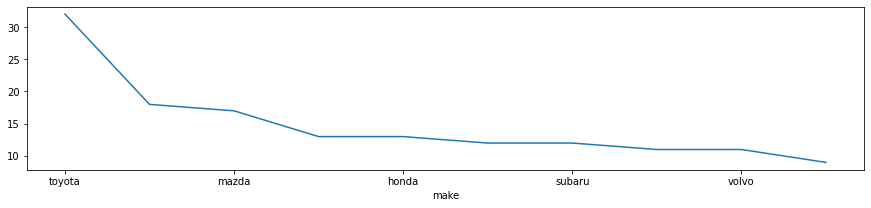

In [13]:
top10.plot(figsize= (15,3))
plt.show

# Count Analysis

In [14]:
car_make = df['make'].value_counts()
px.bar(car_make,
 y = 'count',
 title = 'Car brands sold',
 )

Insights
1 Toyota has the highest number of listings compared to other car brands in the dataset.
2 Mercury has the least number of listings comapred to other car brands in the dataset.

# Highest Price Make Analysis

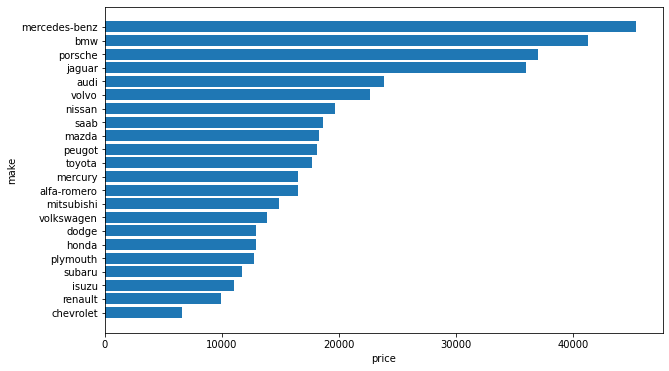

In [15]:
lux_car=(df.sort_values(by=['price'],ascending=False))[:200]
plt.figure(figsize=(10,6))
plt.barh(lux_car['make'],lux_car['price'])
plt.xlabel('price')
plt.ylabel('make')
plt.gca().invert_yaxis()
plt.show()

In [16]:
df.loc[df["num-of-cylinders"]=="eight"]

symboling normalized-losses           make fuel-type aspiration  \
67         -1                 ?  mercedes-benz       gas        std   
68          3               142  mercedes-benz       gas        std   
69          0                 ?  mercedes-benz       gas        std   
70          1                 ?  mercedes-benz       gas        std   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  length  \
67         four        sedan          rwd           front       115.6   202.6   
68          two  convertible          rwd           front        96.6   180.3   
69         four        sedan          rwd           front       120.9   208.1   
70          two      hardtop          rwd           front       112.0   199.2   

    width  height  curb-weight engine-type num-of-cylinders  engine-size  \
67   71.7    56.5         3740        ohcv            eight          234   
68   70.5    50.8         3685        ohcv            eight          234   
69   71.7    56.7         3900        ohcv            eight          308   
70   72.0    55.4         3715        ohcv            eight          304   

   fuel-system  bore stroke  compression-ratio horsepower peak-rpm  city-mpg  \
67        mpfi  3.46   3.10                8.3        155     4750        16   
68        mpfi  3.46   3.10                8.3        155     4750        16   
69        mpfi  3.80   3.35                8.0        184     4500        14   
70        mpfi  3.80   3.35                8.0        184     4500        14   

    highway-mpg  price  
67           18  34184  
68           18  35056  
69           16  40960  
70           16  45400

In [17]:
df.loc[df["city-mpg"]==49]

symboling normalized-losses   make fuel-type aspiration num-of-doors  \
28          2               137  honda       gas        std          two   

   body-style drive-wheels engine-location  wheel-base  length  width  height  \
28  hatchback          fwd           front        86.6   144.6   63.9    50.8   

    curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
28         1713         ohc             four           92        1bbl  2.91   

   stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  price  
28   3.41                9.6         58     4800        49           54   6479

# Insights

1 Mercedes-Benz stands out as the brand with the highest average vehicle prices.
2 Mercedes-benz,BMW and Porche are generally valued higher compared to
other brand as it has highest vehcile price.
3 Chevrolet vehicles exhibit the highest average city miles per gallon (MPG) compared to other makes.
4 Chevrolet is the least priced vehicle make compared to others and it has the least horsepowerit has more city MPG.

# Univariate Analysis

In [18]:
df_num=df.select_dtypes(exclude='object')
df_var=df.select_dtypes(include='object')

In [19]:
df_num[["normalized-losses", 'make', 'bore', 'horsepower']] = df_var[['normalized-losses', 'make', 'bore', 'horsepower']]

df_num

symboling  wheel-base  length  width  height  curb-weight  engine-size  \
0            3        88.6   168.8   64.1    48.8         2548          130   
1            1        94.5   171.2   65.5    52.4         2823          152   
2            2        99.8   176.6   66.2    54.3         2337          109   
3            2        99.4   176.6   66.4    54.3         2824          136   
4            2        99.8   177.3   66.3    53.1         2507          136   
..         ...         ...     ...    ...     ...          ...          ...   
195         -1       109.1   188.8   68.9    55.5         2952          141   
196         -1       109.1   188.8   68.8    55.5         3049          141   
197         -1       109.1   188.8   68.9    55.5         3012          173   
198         -1       109.1   188.8   68.9    55.5         3217          145   
199         -1       109.1   188.8   68.9    55.5         3062          141   

     compression-ratio  city-mpg  highway-mpg  price normalized-losses  \
0                  9.0        21           27  16500                 ?   
1                  9.0        19           26  16500                 ?   
2                 10.0        24           30  13950               164   
3                  8.0        18           22  17450               164   
4                  8.5        19           25  15250                 ?   
..                 ...       ...          ...    ...               ...   
195                9.5        23           28  16845                95   
196                8.7        19           25  19045                95   
197                8.8        18           23  21485                95   
198               23.0        26           27  22470                95   
199                9.5        19           25  22625                95   

            make  bore horsepower  
0    alfa-romero  3.47        111  
1    alfa-romero  2.68        154  
2           audi  3.19        102  
3           audi  3.19        115  
4           audi  3.19        110  
..           ...   ...        ...  
195        volvo  3.78        114  
196        volvo  3.78        160  
197        volvo  3.58        134  
198        volvo  3.01        106  
199        volvo  3.78        114  

[200 rows x 15 columns]

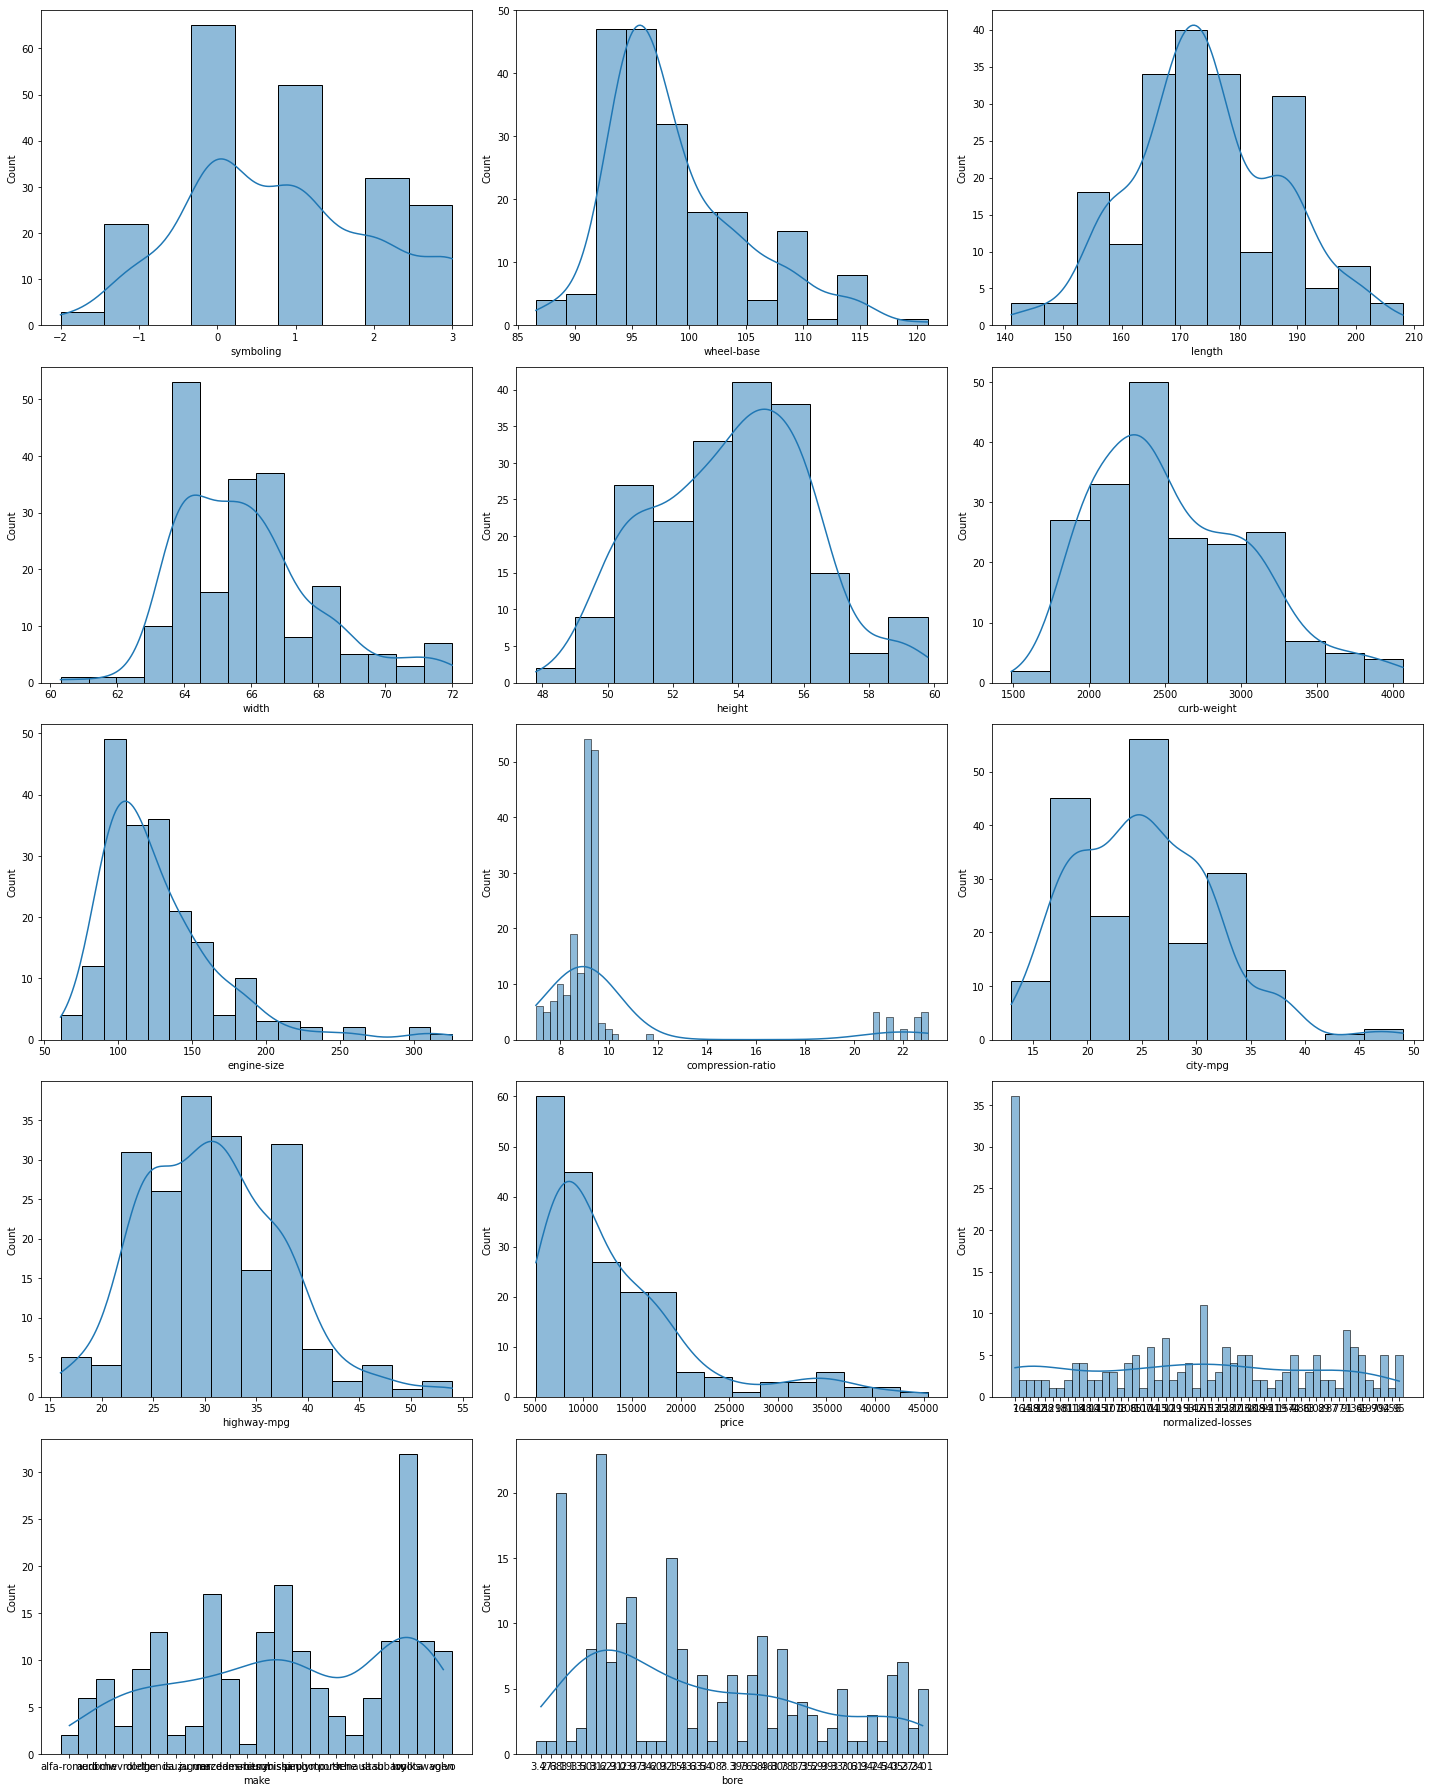

In [20]:
plt.figure(figsize=(20,25), facecolor='white')

plotnumber = 1  # Initialize plotnumber before the loop
for column in df_num:
    if plotnumber <= 14:
        plt.subplot(5, 3, plotnumber)  # Create a subplot
        sns.histplot(x=df_num[column], kde=True)  # Plot histogram with KDE
        plotnumber += 1  # Increment plotnumber after plotting

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Ensure the figure is displayed


Insights
1 Wheel- base has a right skewed distribution and most of the vehicle opt the size of wheel between 95 to 100
2 The length distribution of vehicles is approximately normal, with most vehicles having lengths ranging from 170 to 190 units.
3 The majority of vehicles achieve a city fuel efficiency of approximately 20 to 35 miles per gallon (mpg).
4 The highway fuel efficiency for most vehicles ranges from approximately 20 to 40 miles per gallon (mpg).
5 The majority of vehicle prices fall within the approximate range of 5,000 to 17,000.

In [21]:
df_var1 = df_var.drop(['bore', 'stroke', 'horsepower', 'peak-rpm', 'normalized-losses'], axis=1)
df_var1

make fuel-type aspiration num-of-doors   body-style drive-wheels  \
0    alfa-romero       gas        std          two  convertible          rwd   
1    alfa-romero       gas        std          two    hatchback          rwd   
2           audi       gas        std         four        sedan          fwd   
3           audi       gas        std         four        sedan          4wd   
4           audi       gas        std          two        sedan          fwd   
..           ...       ...        ...          ...          ...          ...   
195        volvo       gas        std         four        sedan          rwd   
196        volvo       gas      turbo         four        sedan          rwd   
197        volvo       gas        std         four        sedan          rwd   
198        volvo    diesel      turbo         four        sedan          rwd   
199        volvo       gas      turbo         four        sedan          rwd   

    engine-location engine-type num-of-cylinders fuel-system  
0             front        dohc             four        mpfi  
1             front        ohcv              six        mpfi  
2             front         ohc             four        mpfi  
3             front         ohc             five        mpfi  
4             front         ohc             five        mpfi  
..              ...         ...              ...         ...  
195           front         ohc             four        mpfi  
196           front         ohc             four        mpfi  
197           front        ohcv              six        mpfi  
198           front         ohc              six         idi  
199           front         ohc             four        mpfi  

[200 rows x 10 columns]

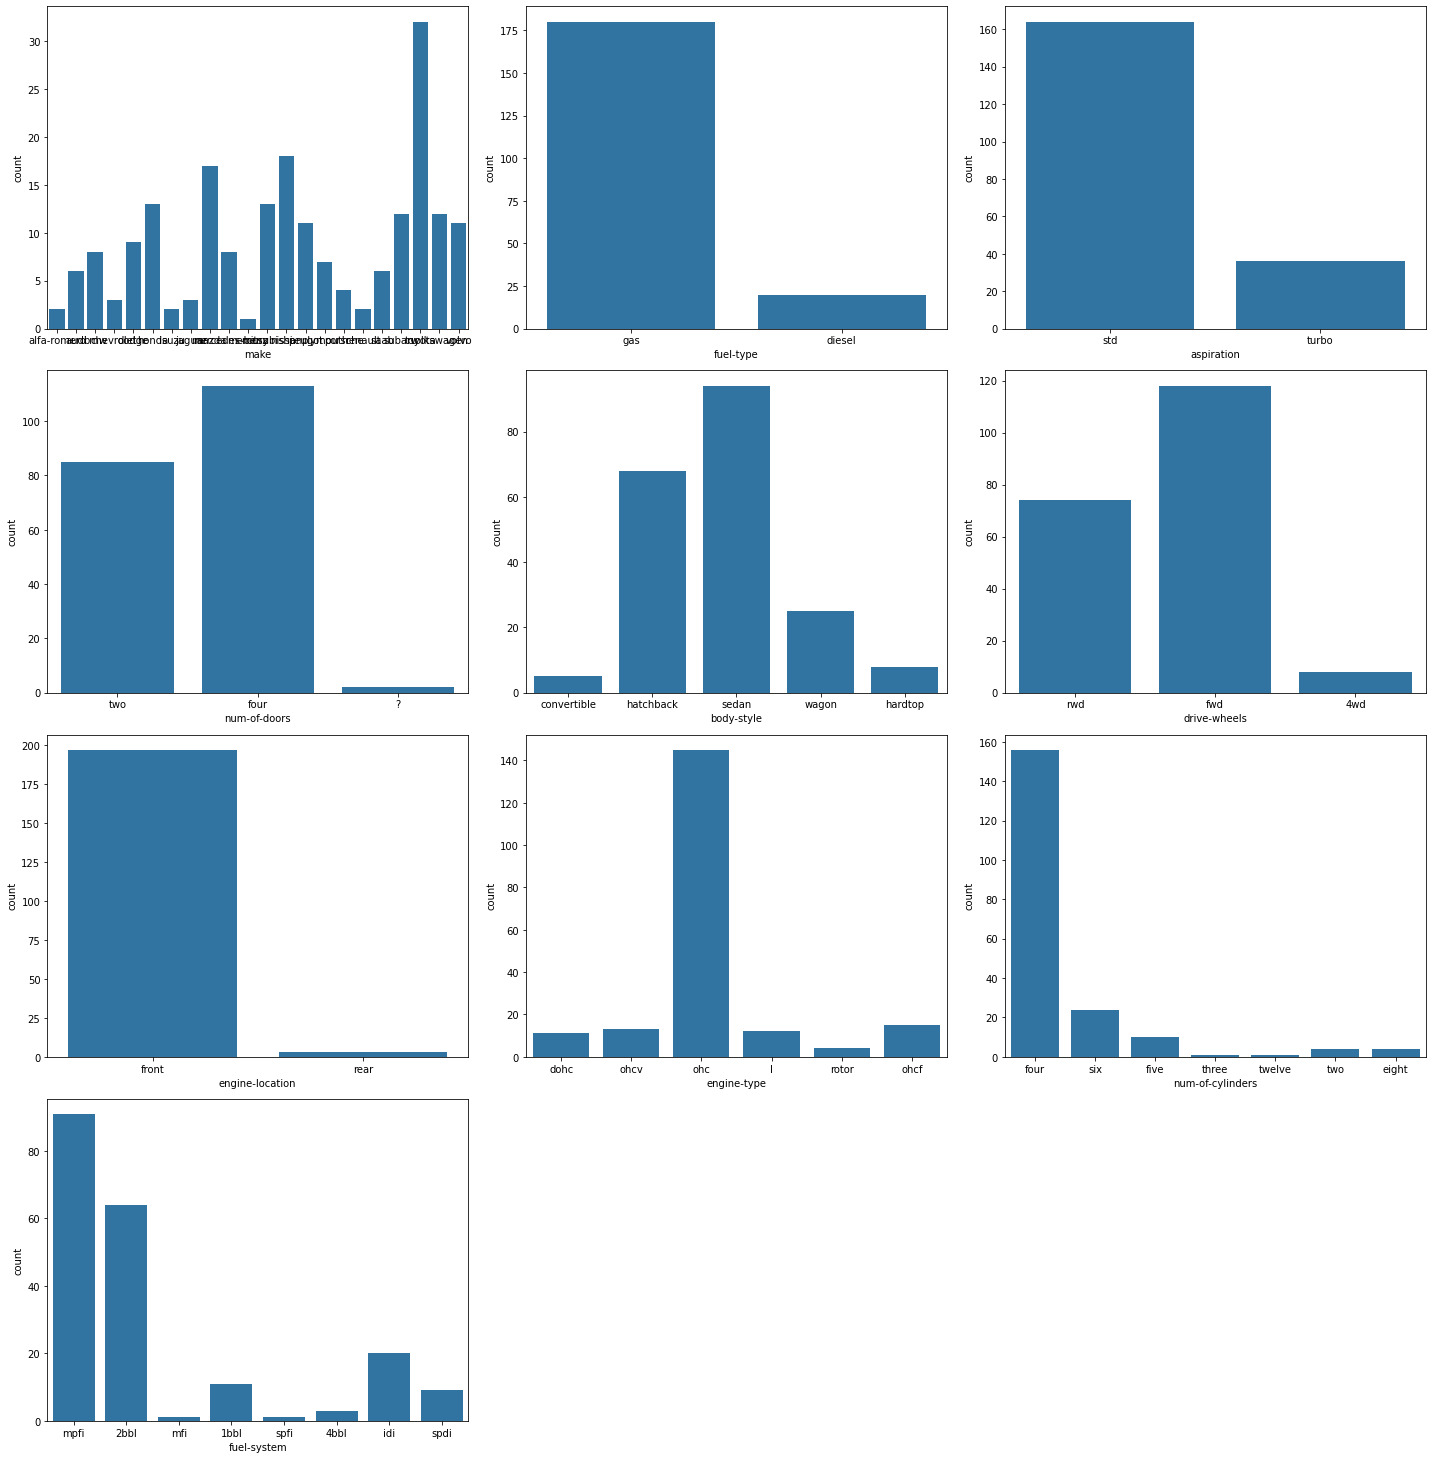

In [22]:
plt.figure(figsize=(20, 25), facecolor='white')

plotnumber = 1  
for column in df_var1:
    if plotnumber <= 14:  
        plt.subplot(5, 3, plotnumber) 
        sns.countplot(x=df_var1[column])  
        plotnumber += 1  

plt.tight_layout() 
plt.show() 


Toyota is the leading make, has the highest number of listings compared to other car brands in the dataset.

Mercury has the least number of listings comapred to other car brands in the dataset.

The analysis reveals that gasoline is the most prevalent fuel type, with a significantly higher count compared to diesel.

This suggests that the majority of vehicles prefer gasoline over diesel

The analysis indicates that the majority of vehicles are preferred with four doors.

The analysis indicates that the majority of vehicles have the engine located in the front.

The predominance of front-engine layouts reflects a design standard that optimizes performance, safety, and cost-effectiveness for most vehicle manufacturers.

The Overhead Camshaft (OHC) engine type is widely used across all vehicle ranges.

This popularity is due to the OHC design offering several benefits, such as improved engine performance, higher efficiency,
and better fuel economy compared to older engine types.

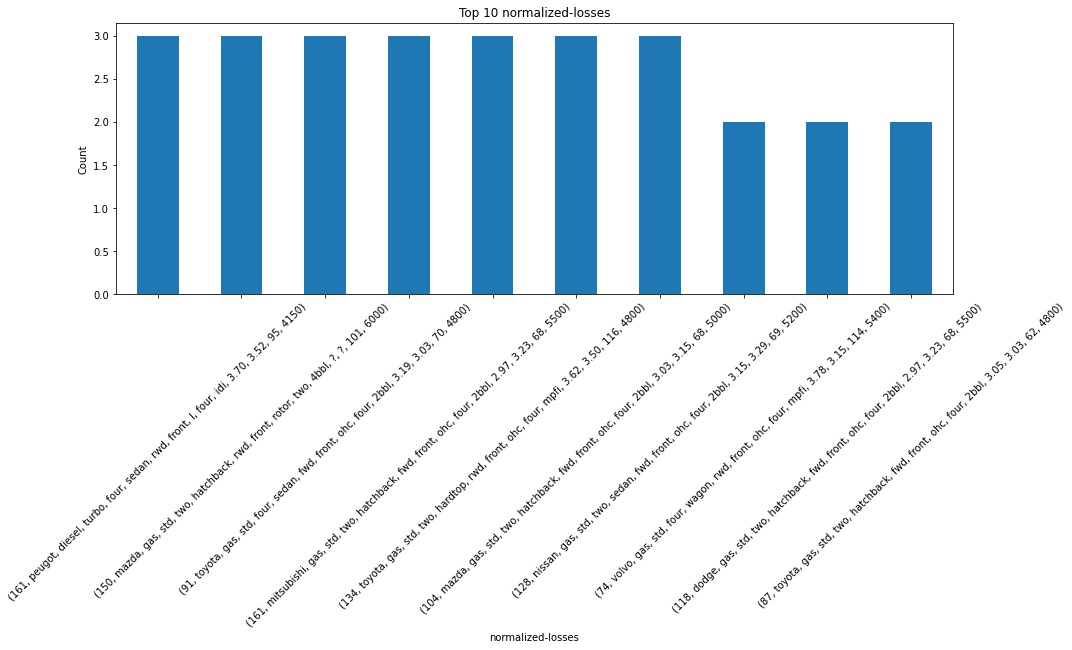

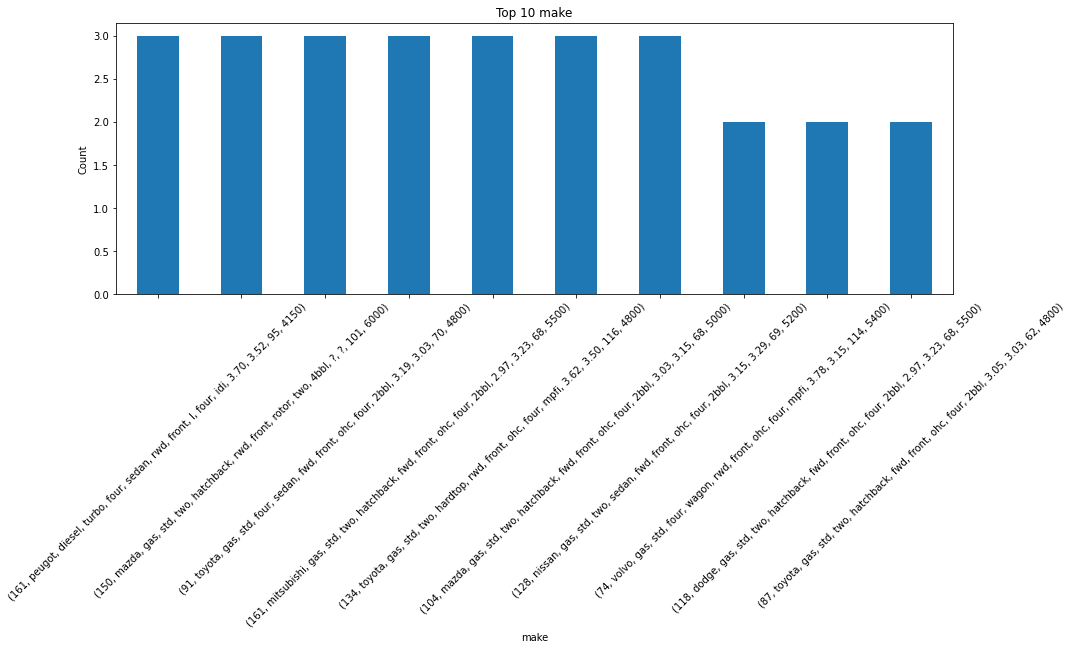

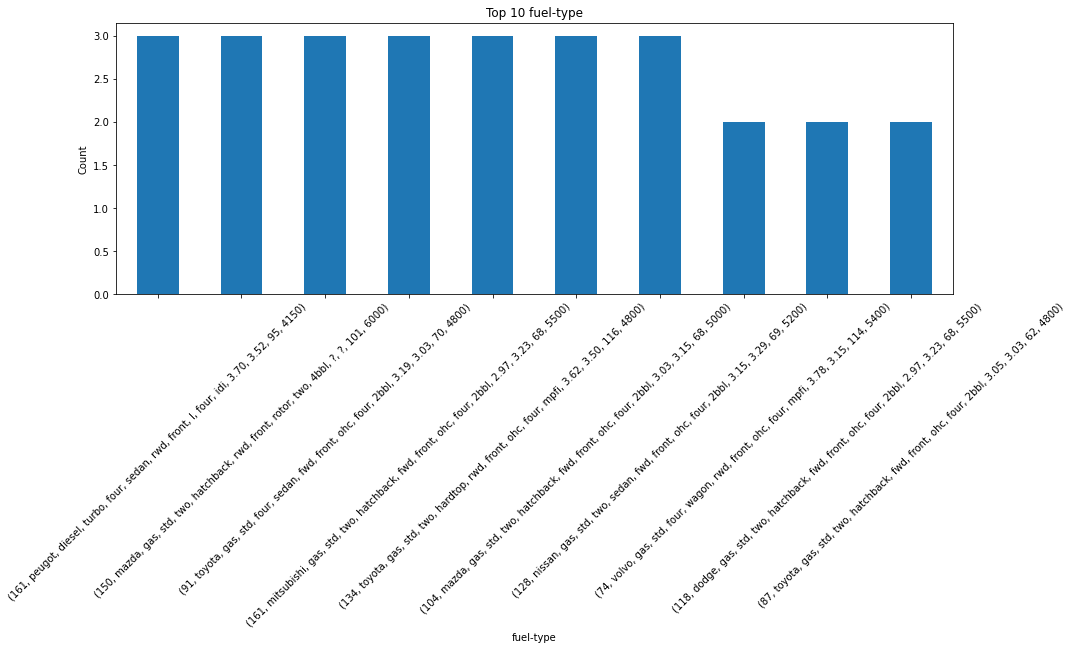

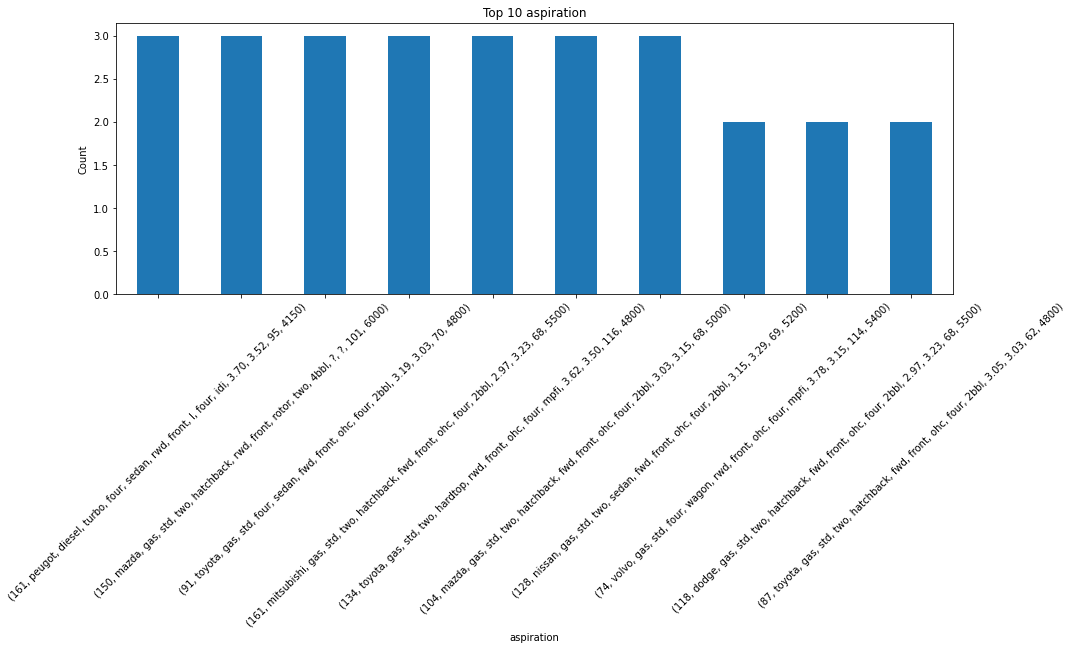

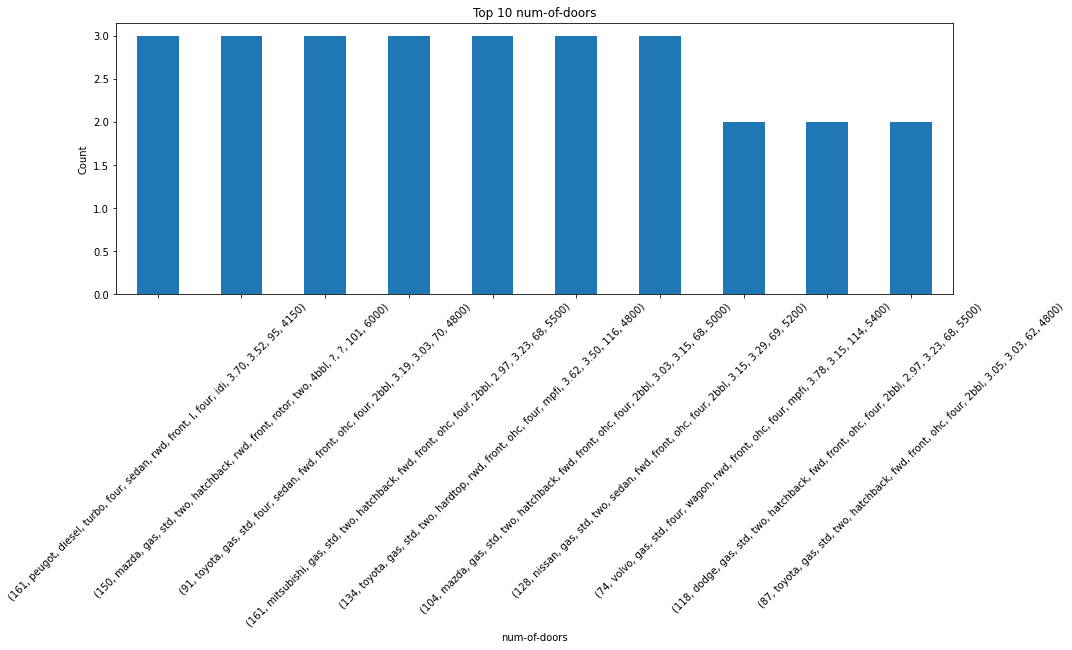

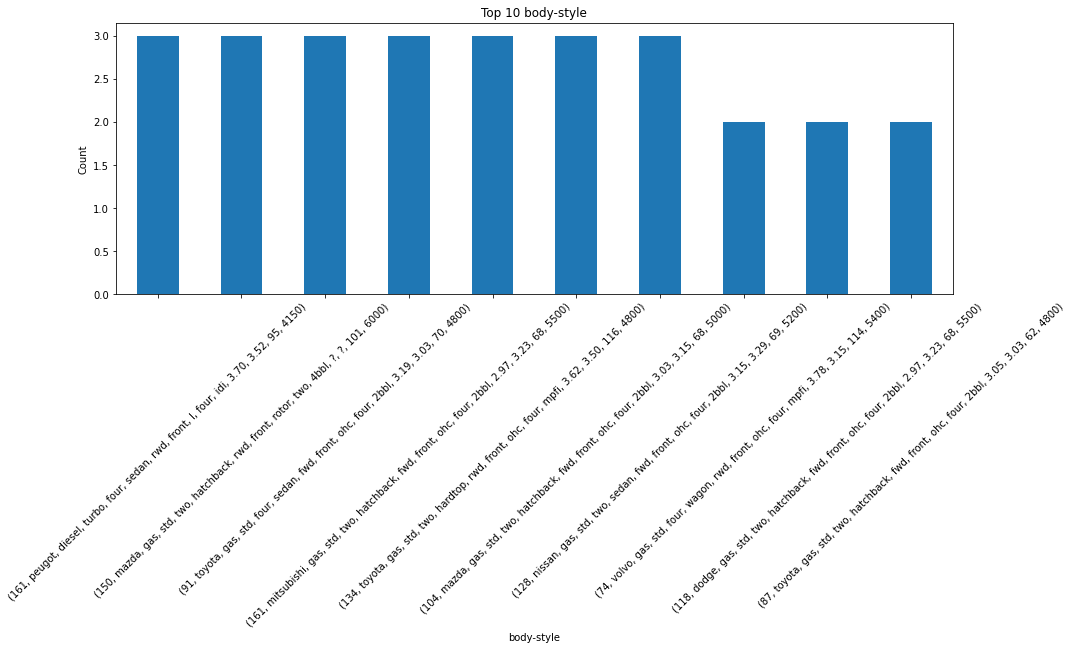

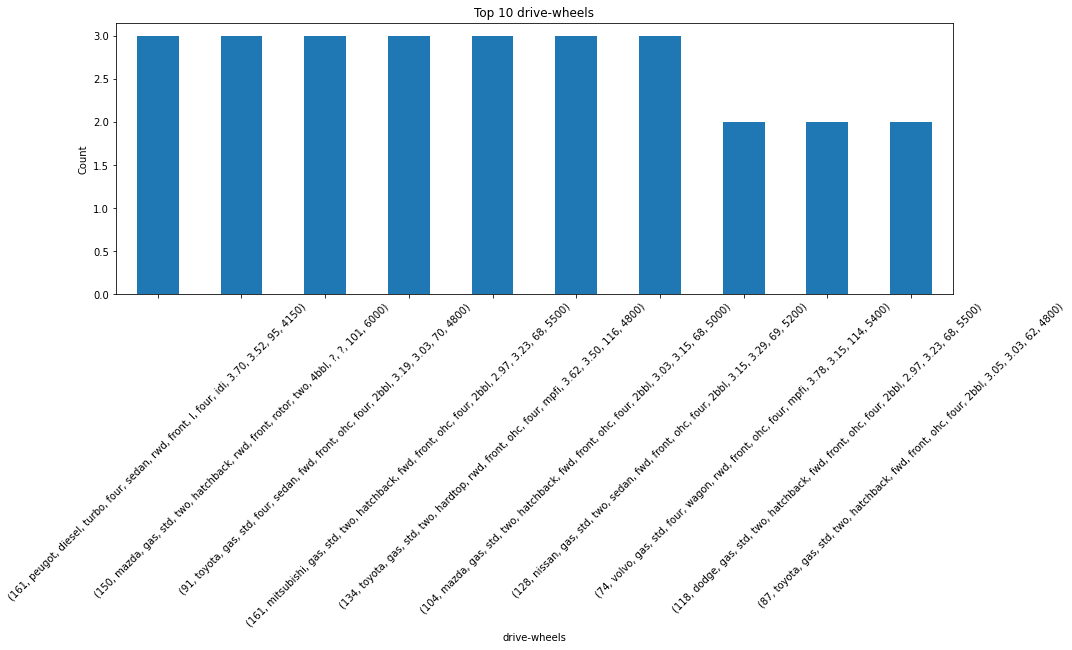

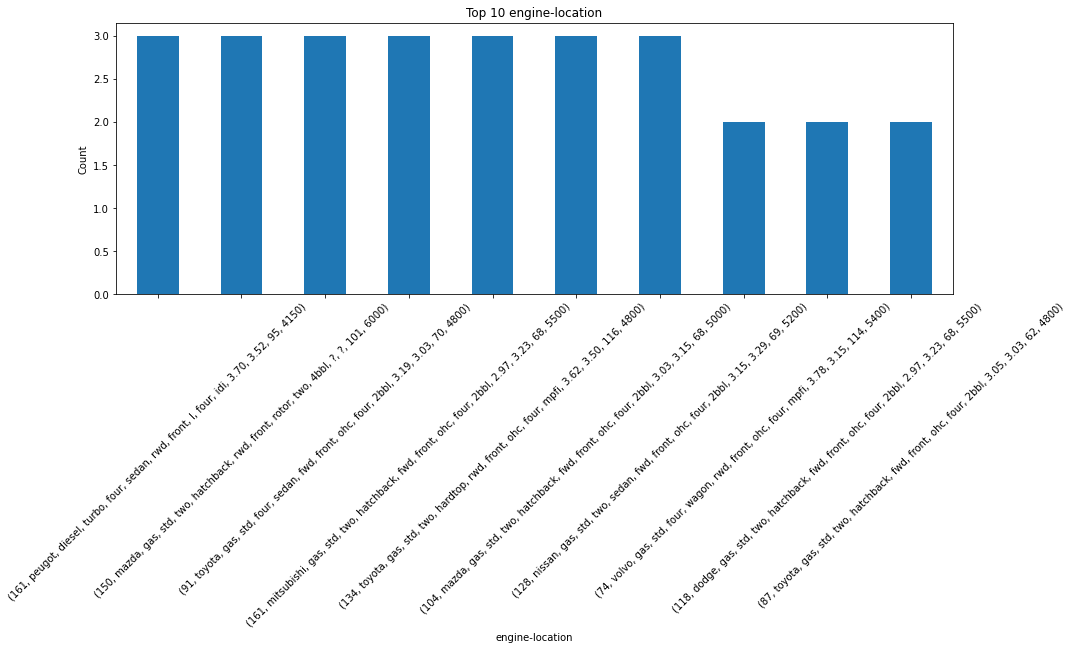

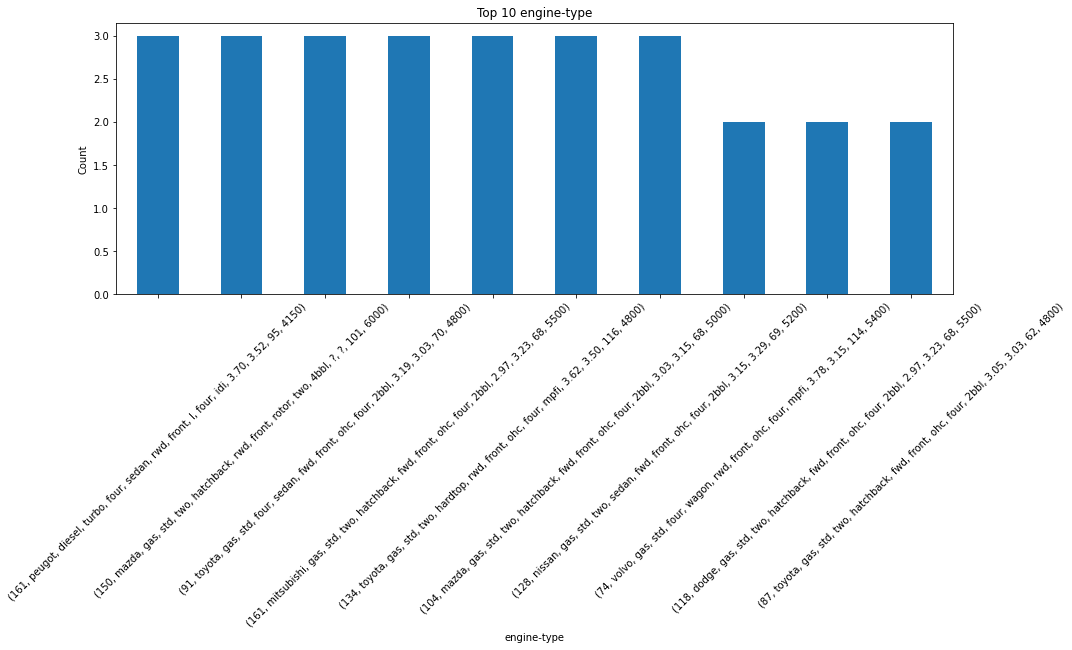

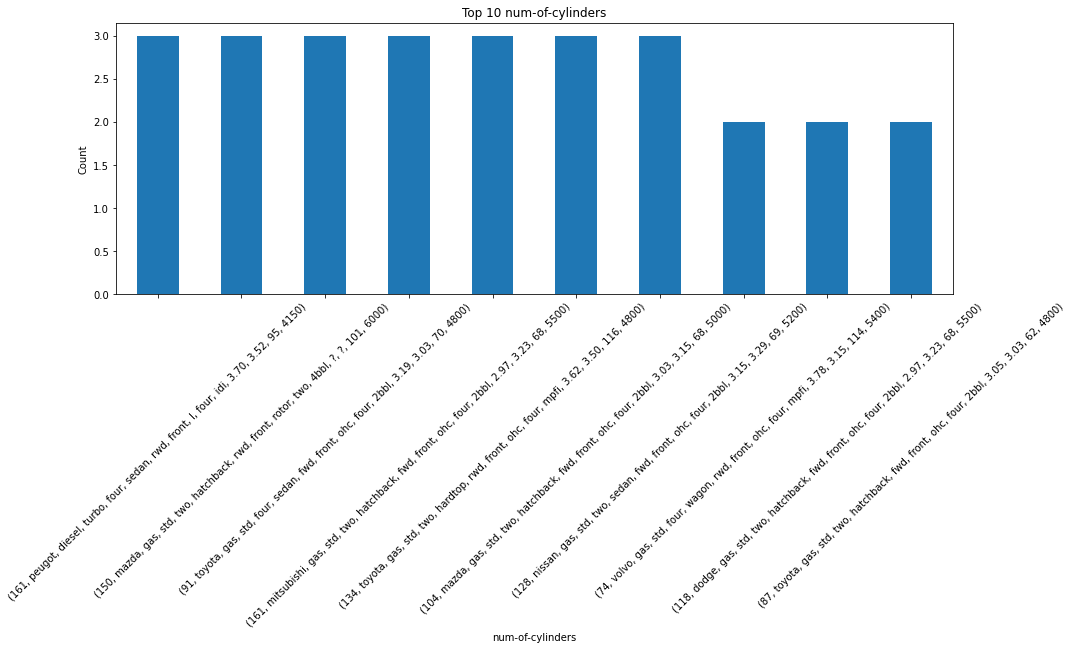

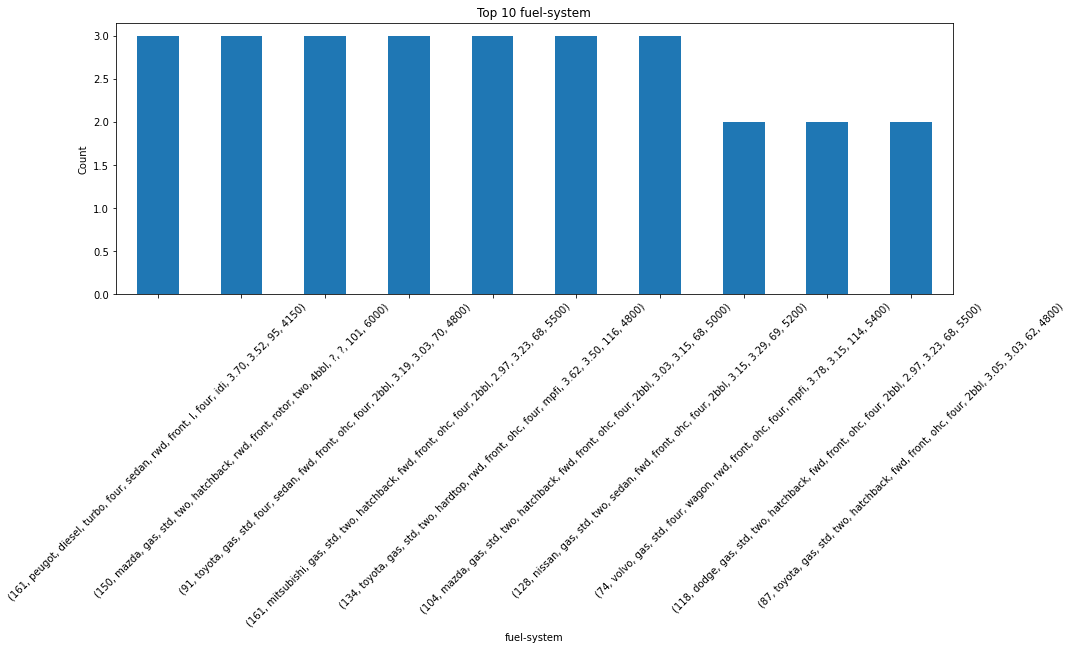

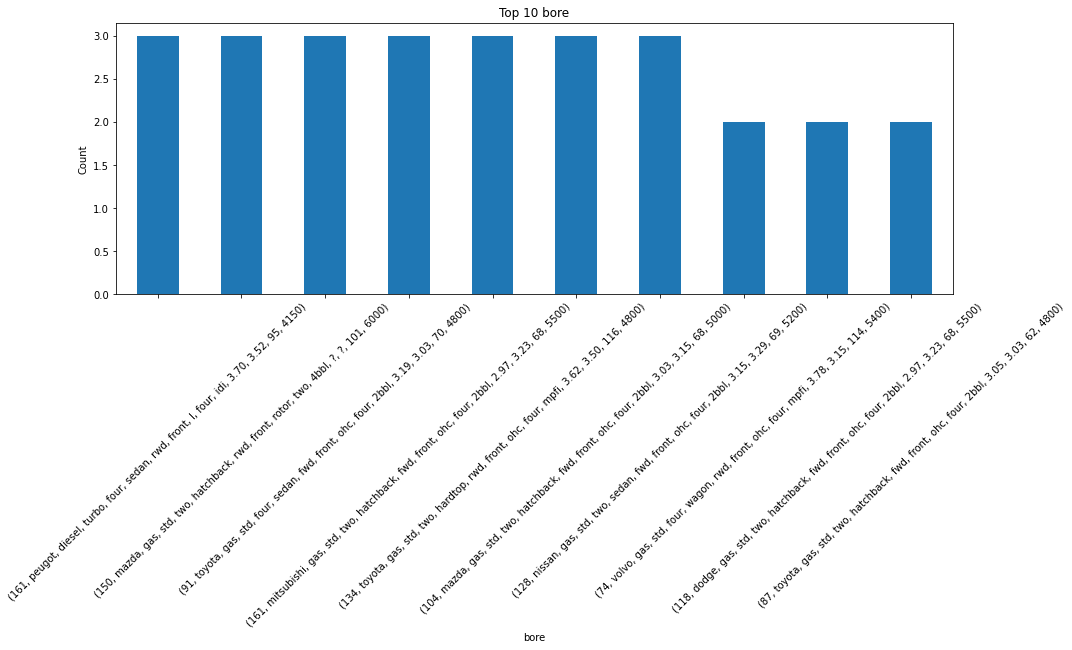

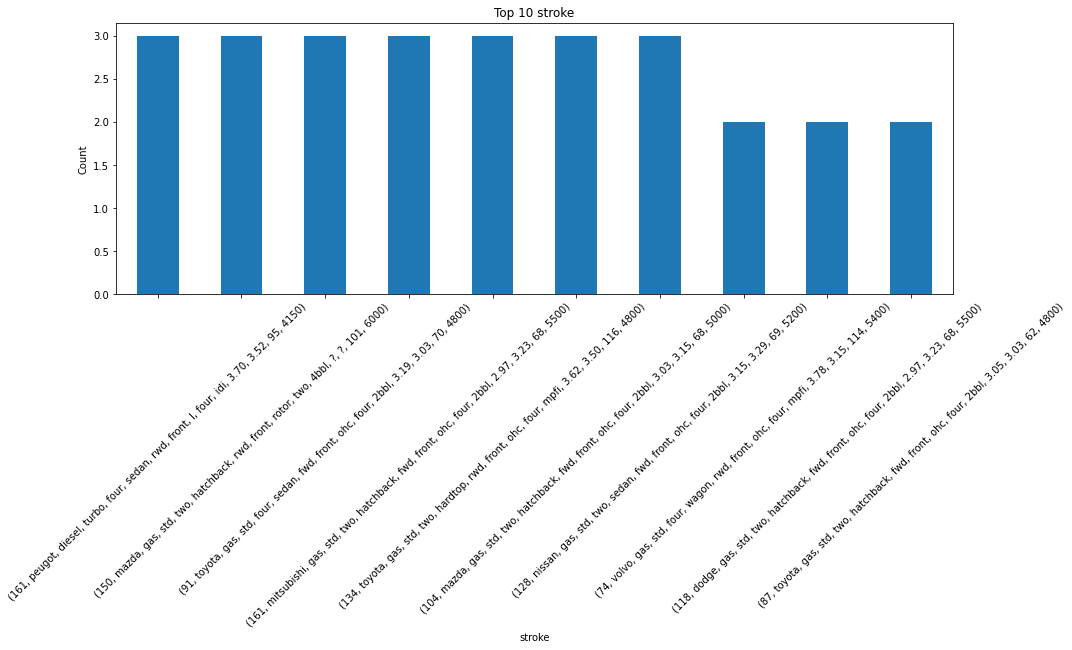

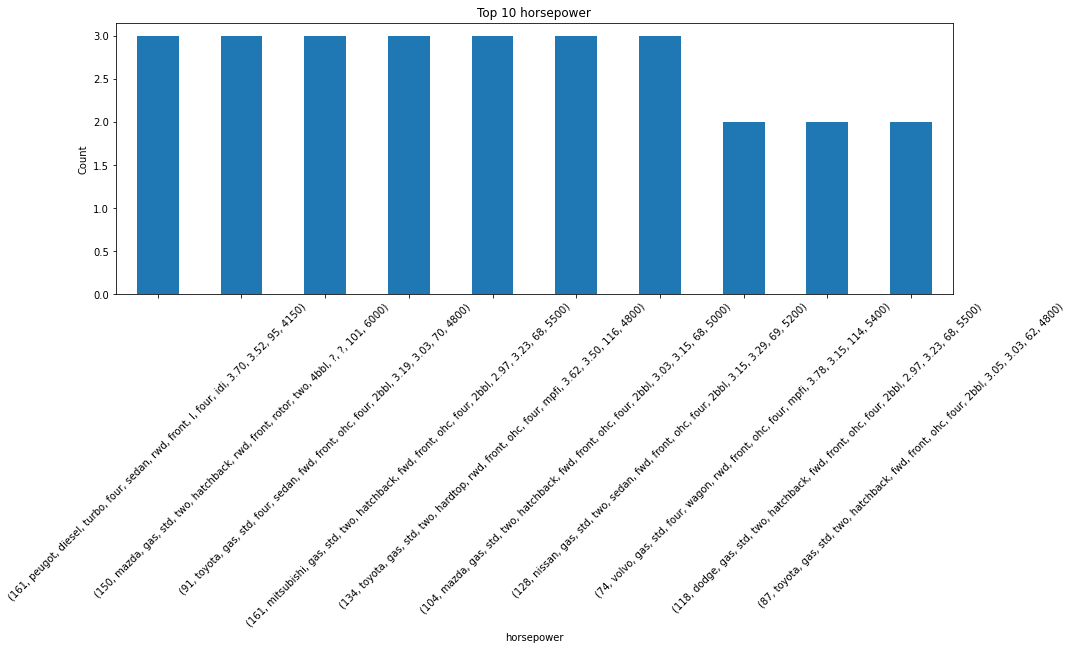

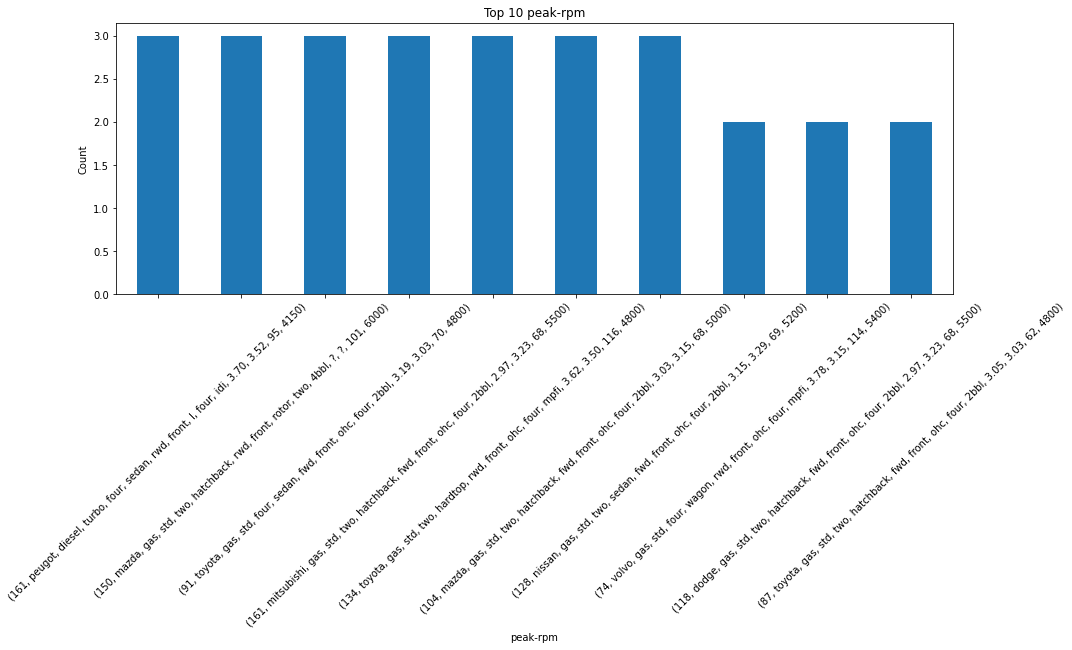

In [23]:
for i in df_var:
    plt.figure(figsize=(15,5))
    var=df_var.value_counts()[:10]
    var.plot(kind="bar")
    plt.title(f'Top 10 {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis

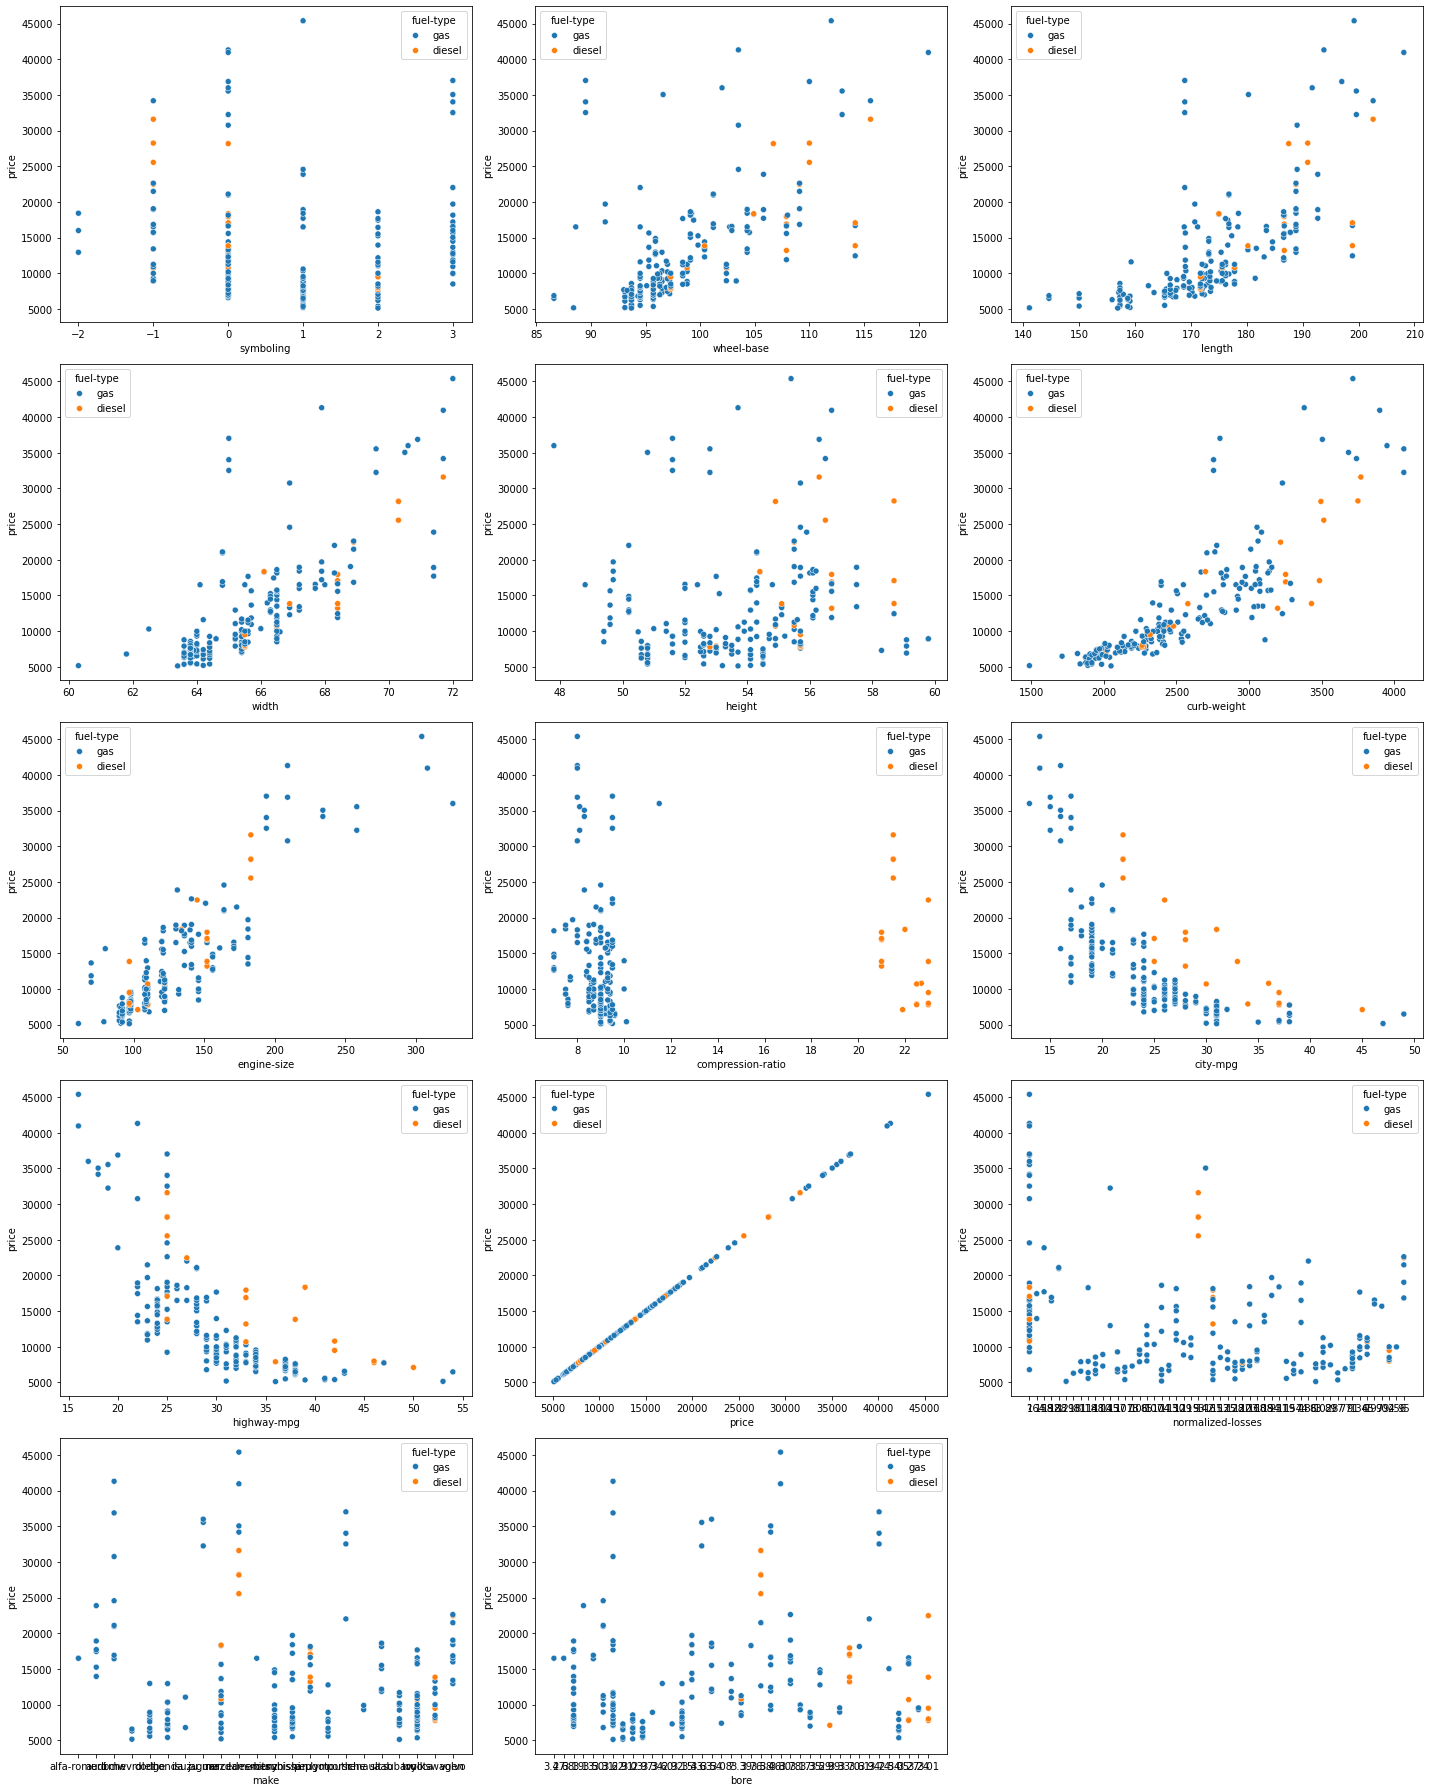

In [24]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for column in df_num:
    if plotnumber<=14:
        plt.subplot(5,3,plotnumber)
        sns.scatterplot(x=df_num[column],y="price",data=df,hue="fuel-type")
        plotnumber+=1
plt.tight_layout()

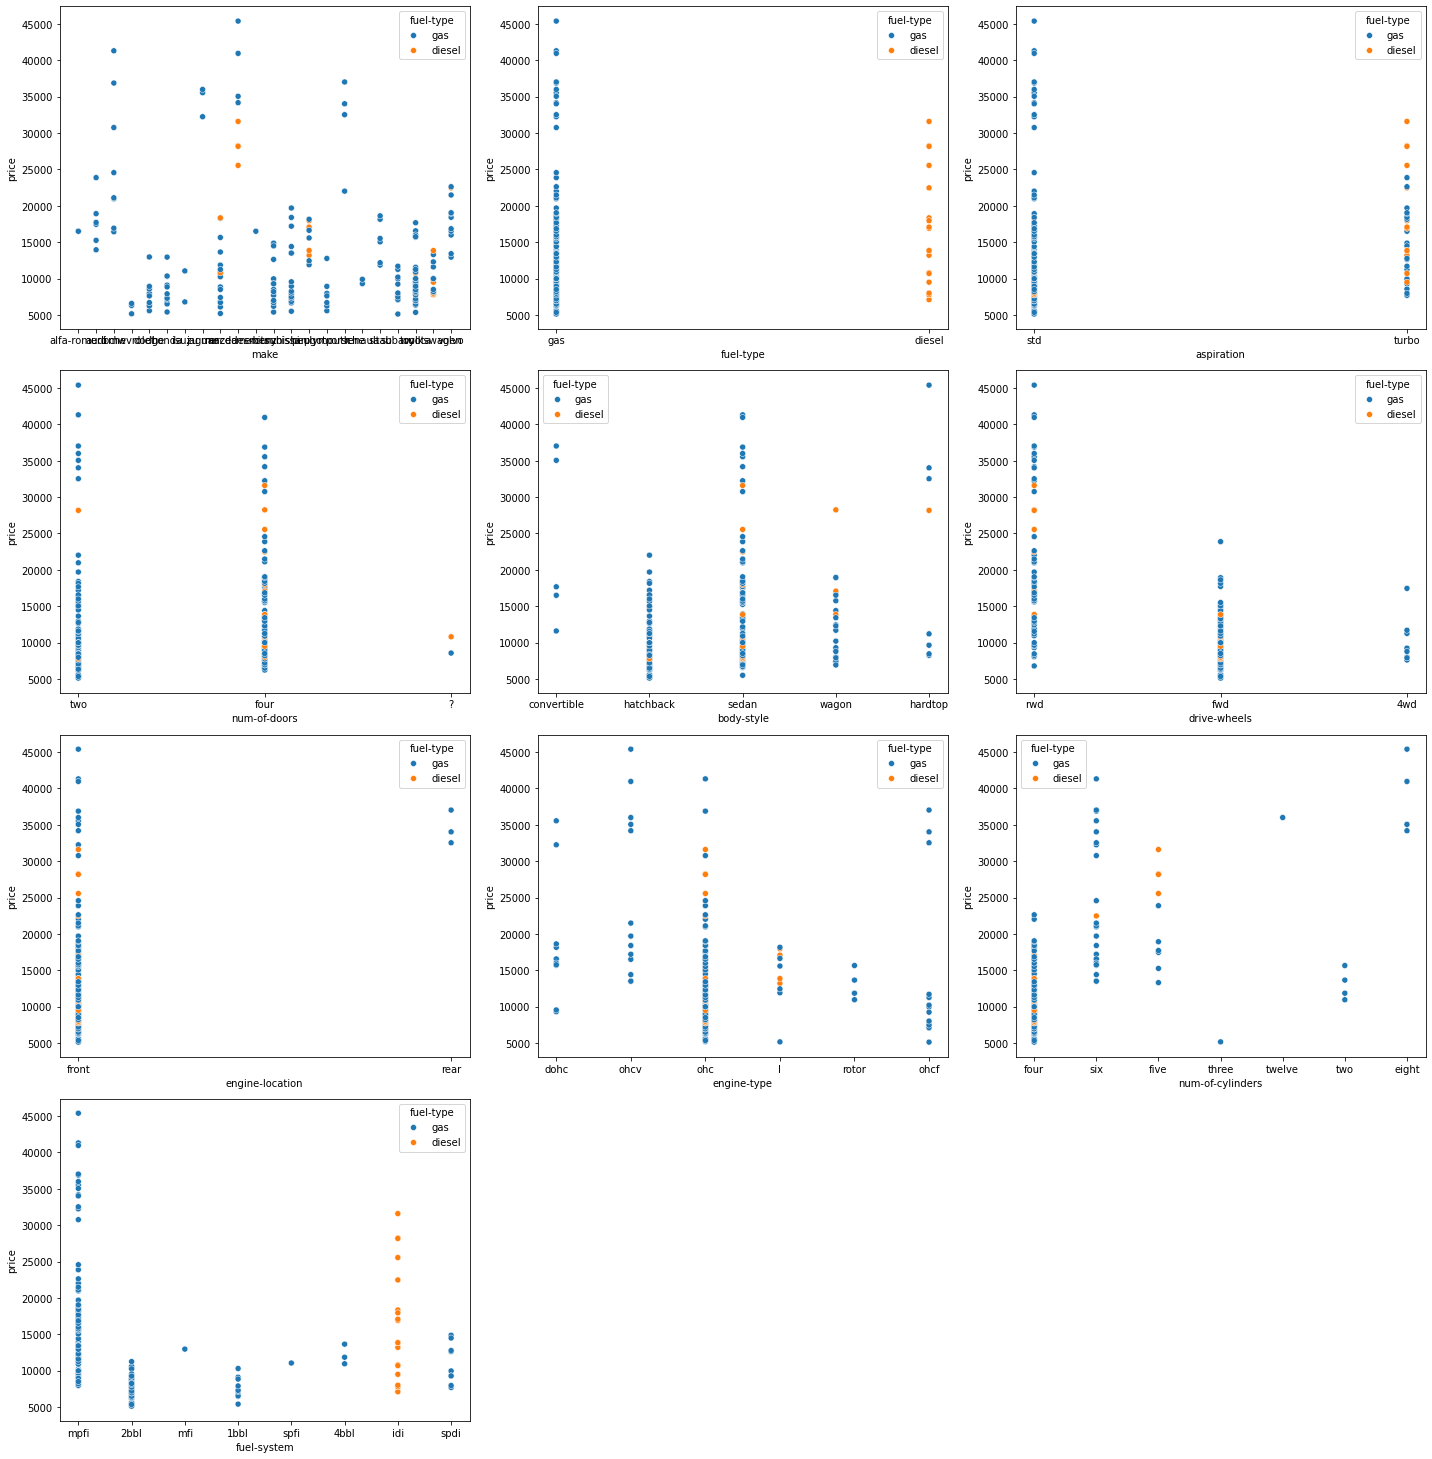

In [25]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for column in df_var1:
    if plotnumber<=14:
        plt.subplot(5,3,plotnumber)
        sns.scatterplot(x=df_var1[column],y="price",data=df,hue="fuel-type")
    plotnumber+=1
plt.tight_layout()

# Insights:

Vehicle with city-mpg range around 15 to 20 have higher car price.
The gas fuel type has highest range of price.
Vehicle with two door has highest price compared to others.
Hardtop body style has highest priced vehicle .
sedan body style as wide range of vehicle from lowest to highest price.
The rear drive wheels encompasses a wide range of vehicles, from the
lowest to the highest priced.

<Figure size 7200x7200 with 0 Axes>

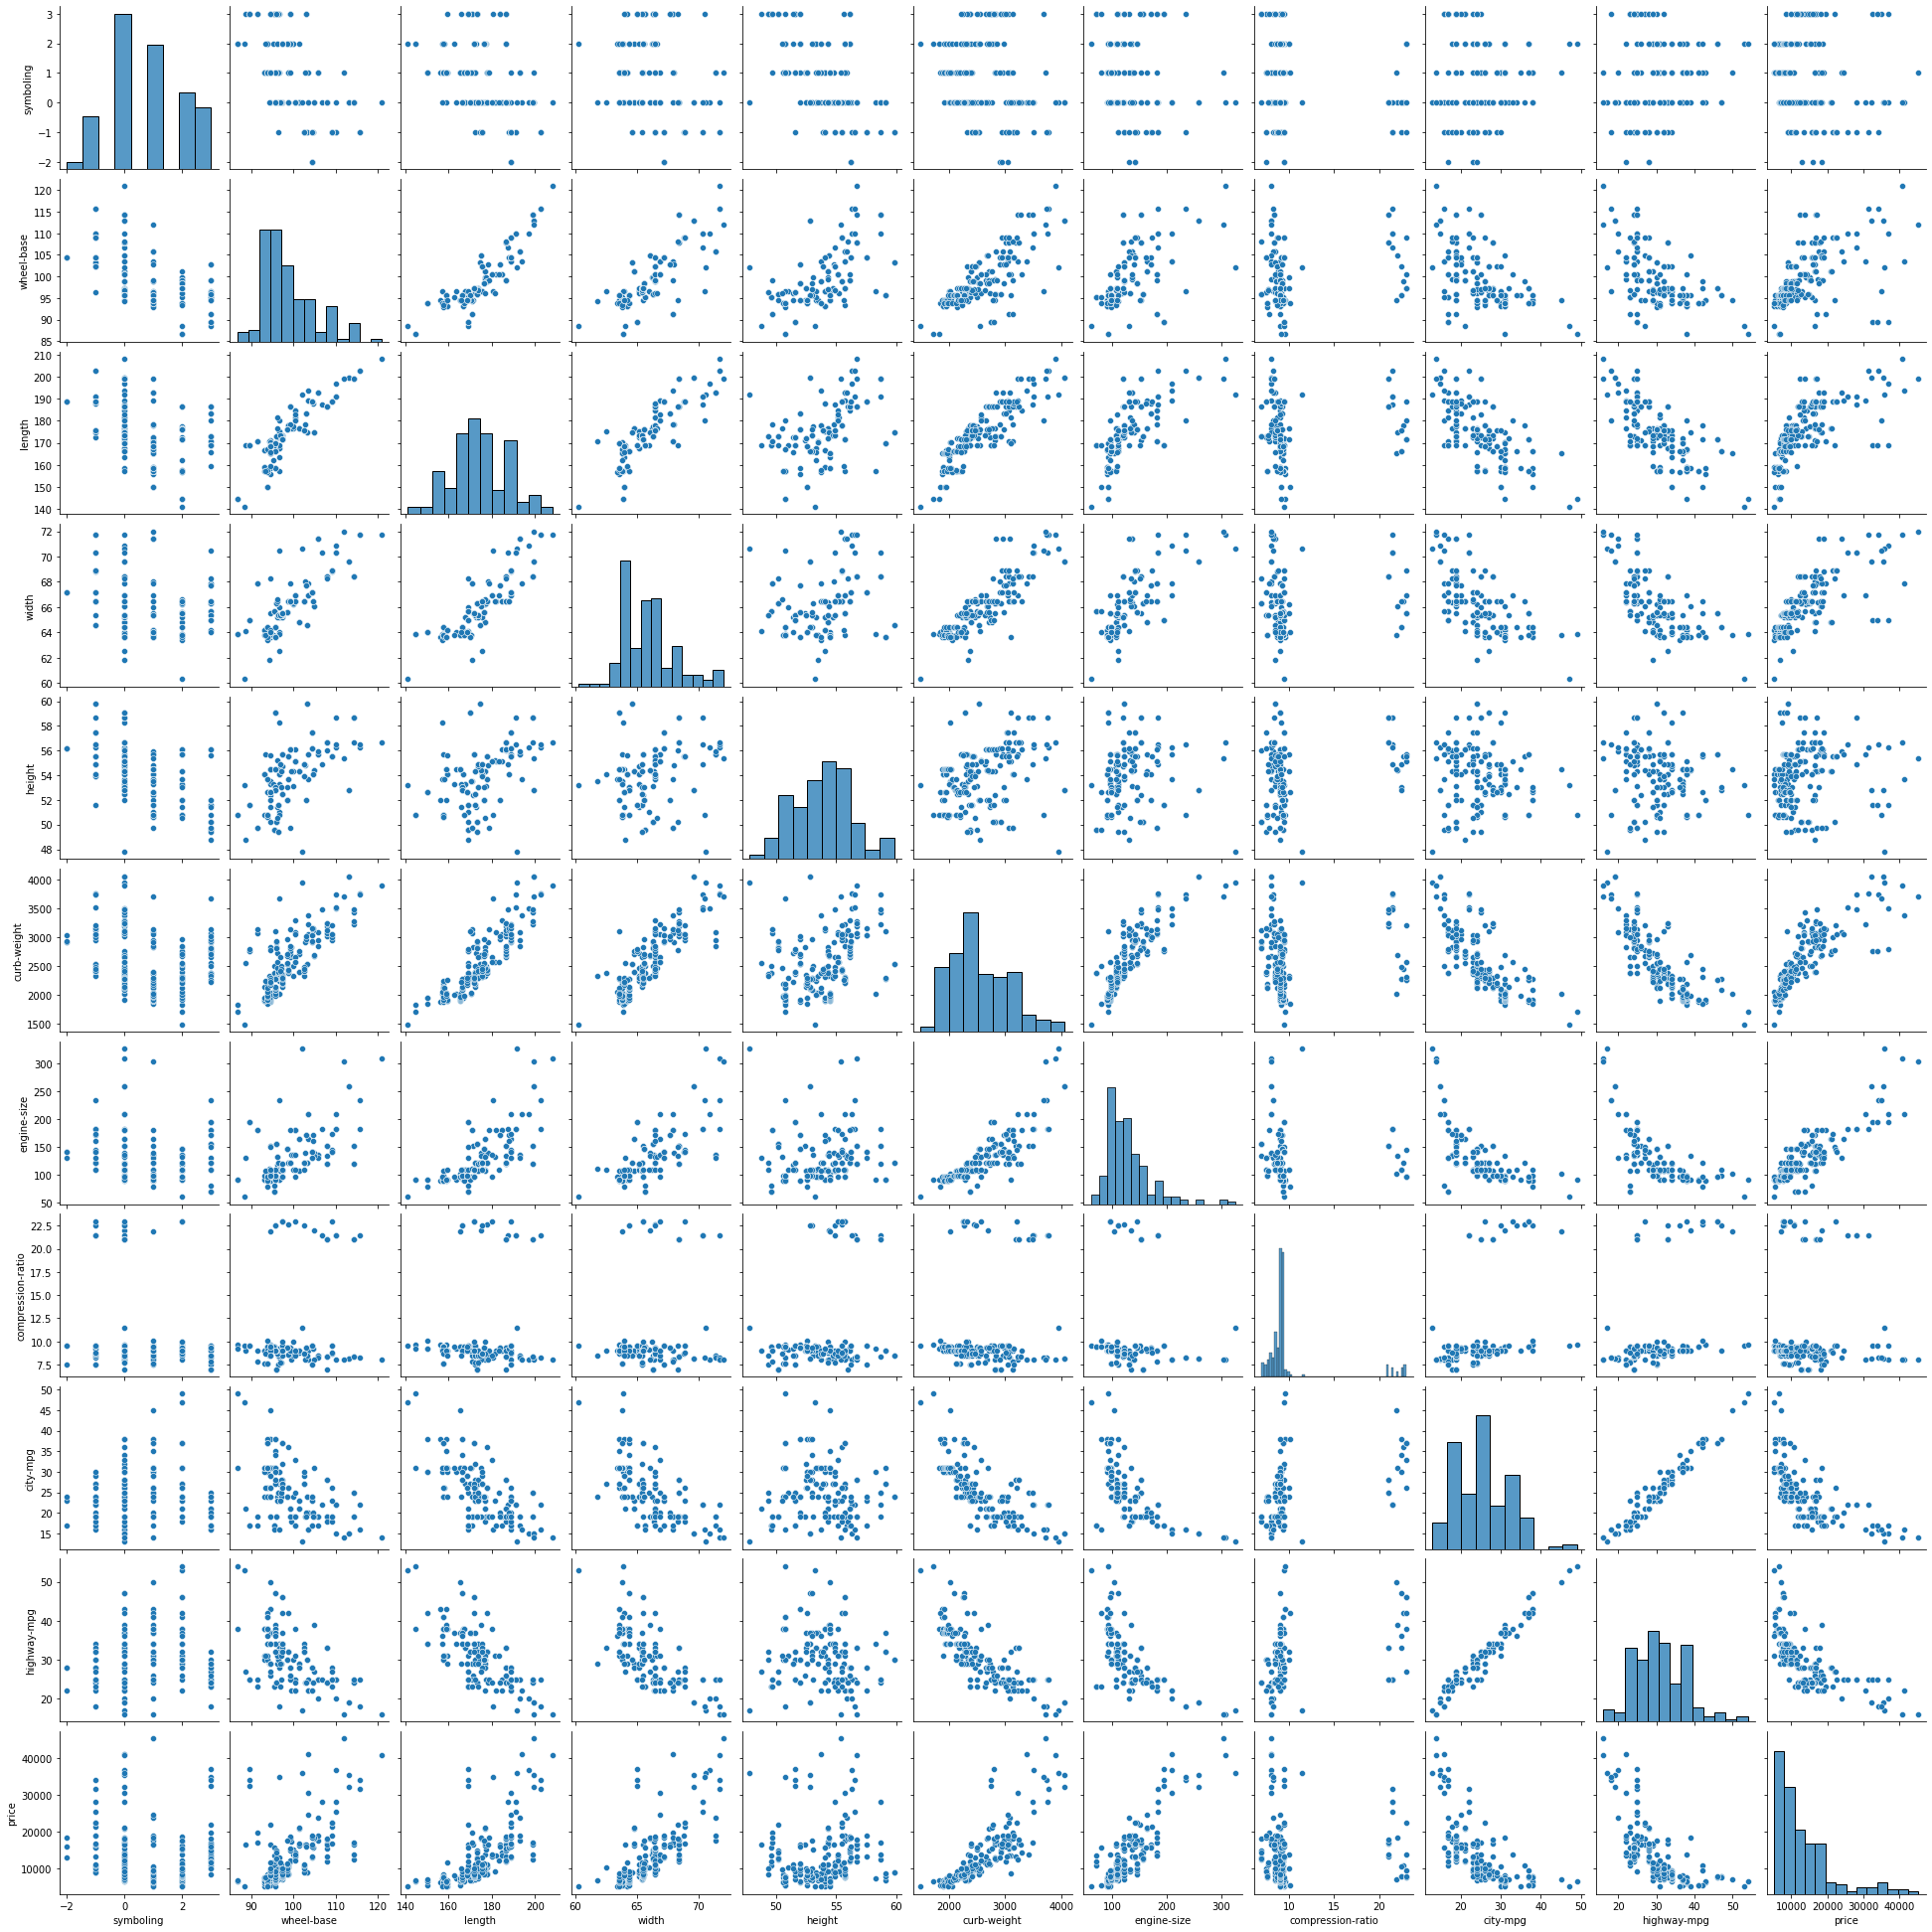

In [26]:
plt.figure(figsize=(100,100))
sns.pairplot(df)

# Data Preprocessing

In [27]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [28]:
df.duplicated().sum()

0

In [29]:
qm_columns = df.isin(['?']).any()
qm_columns

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [30]:
df.replace('?', pd.NA, inplace=True)
df

symboling normalized-losses         make fuel-type aspiration  \
0            3              <NA>  alfa-romero       gas        std   
1            1              <NA>  alfa-romero       gas        std   
2            2               164         audi       gas        std   
3            2               164         audi       gas        std   
4            2              <NA>         audi       gas        std   
..         ...               ...          ...       ...        ...   
195         -1                95        volvo       gas        std   
196         -1                95        volvo       gas      turbo   
197         -1                95        volvo       gas        std   
198         -1                95        volvo    diesel      turbo   
199         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           front        88.6   
1            two    hatchback          rwd           front        94.5   
2           four        sedan          fwd           front        99.8   
3           four        sedan          4wd           front        99.4   
4            two        sedan          fwd           front        99.8   
..           ...          ...          ...             ...         ...   
195         four        sedan          rwd           front       109.1   
196         four        sedan          rwd           front       109.1   
197         four        sedan          rwd           front       109.1   
198         four        sedan          rwd           front       109.1   
199         four        sedan          rwd           front       109.1   

     length  width  height  curb-weight engine-type num-of-cylinders  \
0     168.8   64.1    48.8         2548        dohc             four   
1     171.2   65.5    52.4         2823        ohcv              six   
2     176.6   66.2    54.3         2337         ohc             four   
3     176.6   66.4    54.3         2824         ohc             five   
4     177.3   66.3    53.1         2507         ohc             five   
..      ...    ...     ...          ...         ...              ...   
195   188.8   68.9    55.5         2952         ohc             four   
196   188.8   68.8    55.5         3049         ohc             four   
197   188.8   68.9    55.5         3012        ohcv              six   
198   188.8   68.9    55.5         3217         ohc              six   
199   188.8   68.9    55.5         3062         ohc             four   

     engine-size fuel-system  bore stroke  compression-ratio horsepower  \
0            130        mpfi  3.47   2.68                9.0        111   
1            152        mpfi  2.68   3.47                9.0        154   
2            109        mpfi  3.19   3.40               10.0        102   
3            136        mpfi  3.19   3.40                8.0        115   
4            136        mpfi  3.19   3.40                8.5        110   
..           ...         ...   ...    ...                ...        ...   
195          141        mpfi  3.78   3.15                9.5        114   
196          141        mpfi  3.78   3.15                8.7        160   
197          173        mpfi  3.58   2.87                8.8        134   
198          145         idi  3.01   3.40               23.0        106   
199          141        mpfi  3.78   3.15                9.5        114   

    peak-rpm  city-mpg  highway-mpg  price  
0       5000        21           27  16500  
1       5000        19           26  16500  
2       5500        24           30  13950  
3       5500        18           22  17450  
4       5500        19           25  15250  
..       ...       ...          ...    ...  
195     5400        23           28  16845  
196     5300        19           25  19045  
197     5500        18           23  21485  
198     4800        26           27  22470  
199     5400  

In [31]:
df.isnull().sum()

symboling             0
normalized-losses    36
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [32]:
df["normalized-losses"].fillna(115,inplace=True)

In [33]:
df["num-of-doors"].fillna("four",inplace=True)

In [34]:
df["bore"].fillna(3.31,inplace=True)

In [35]:
df["stroke"].fillna(3.29,inplace=True)

In [36]:
df["horsepower"].fillna(95,inplace=True)

In [37]:
df["peak-rpm"].fillna(5200,inplace=True)

In [38]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

In [40]:
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['horsepower'] = df['horsepower'].astype(int)
df['peak-rpm'] = df['peak-rpm'].astype(int)
df['normalized-losses'] = df['normalized-losses'].astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    int32  
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

Insights:
Changing the datatype of below mentioned five features as they all are in string datatype
Converting "bore" , "stroke" to float64 datatype
Converting "horsepower" and "peak-rpm ","normalized-losses" to int64
datatype

# Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [43]:
for i in df.select_dtypes(include="object"):
    df[i]=lc.fit_transform(df[i])

# Feature Selection

In [44]:
corr = df.corr()

<Axes: >

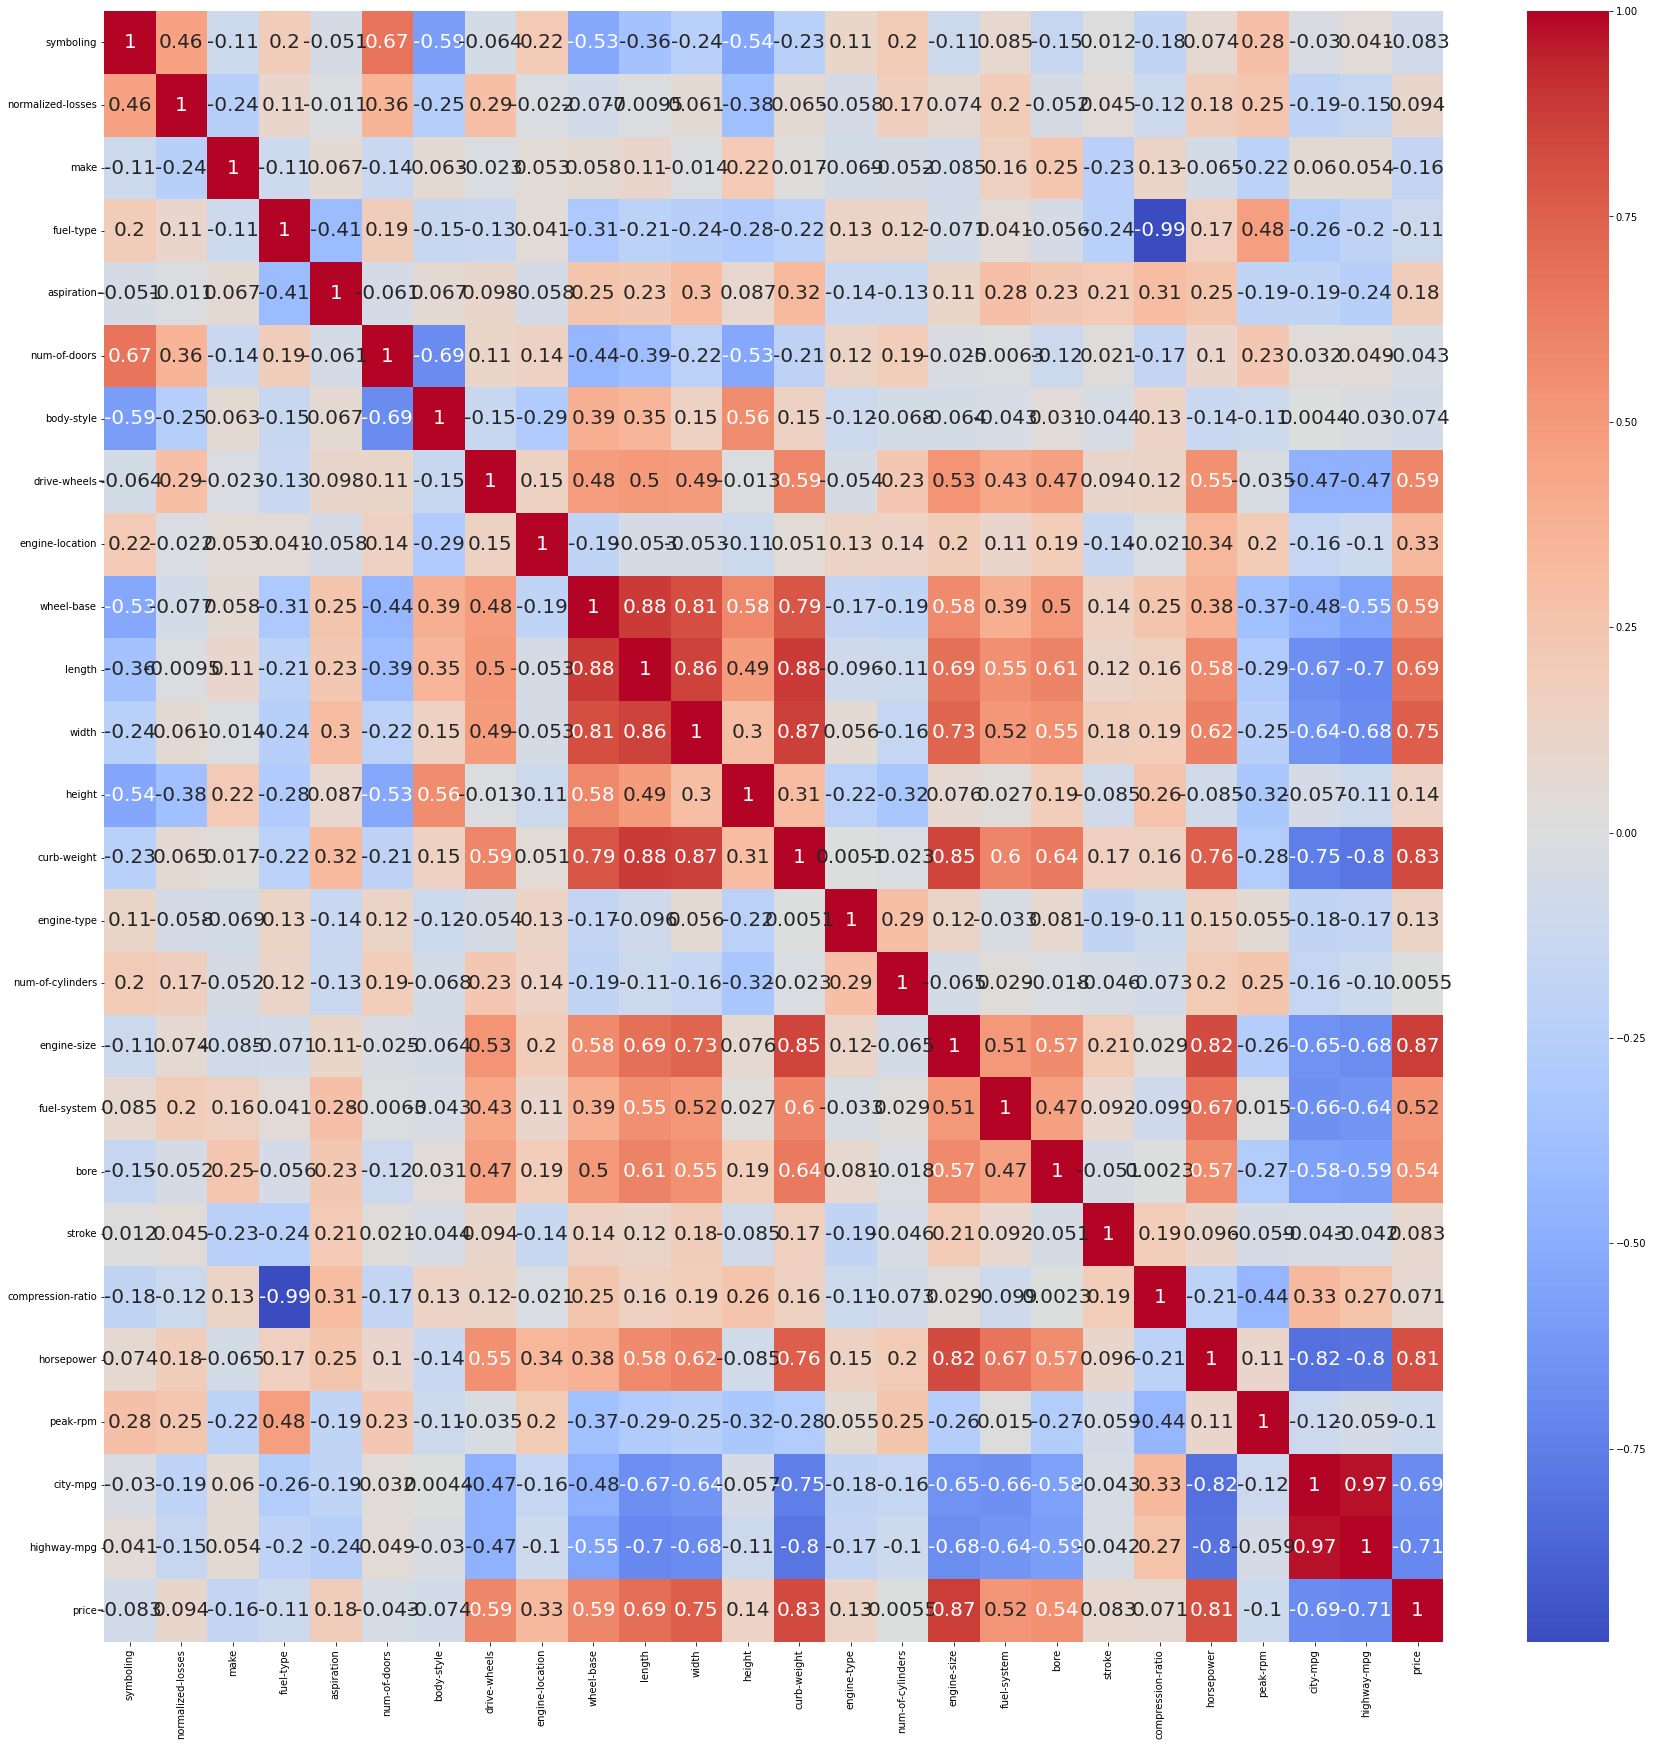

In [45]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",annot_kws={"size":20})

Insights:
High correlation between length and wheel-base - 87%
High correlation between width and length -85%
High correlation between length and curbweight - 88%
High correlation between width and curbweight - 86
High correlation between City mpg and high mpg -97
Horsepower and engine_size are highly correlated with price

# Outliers

In [46]:
df_num1=df.select_dtypes(exclude='object')

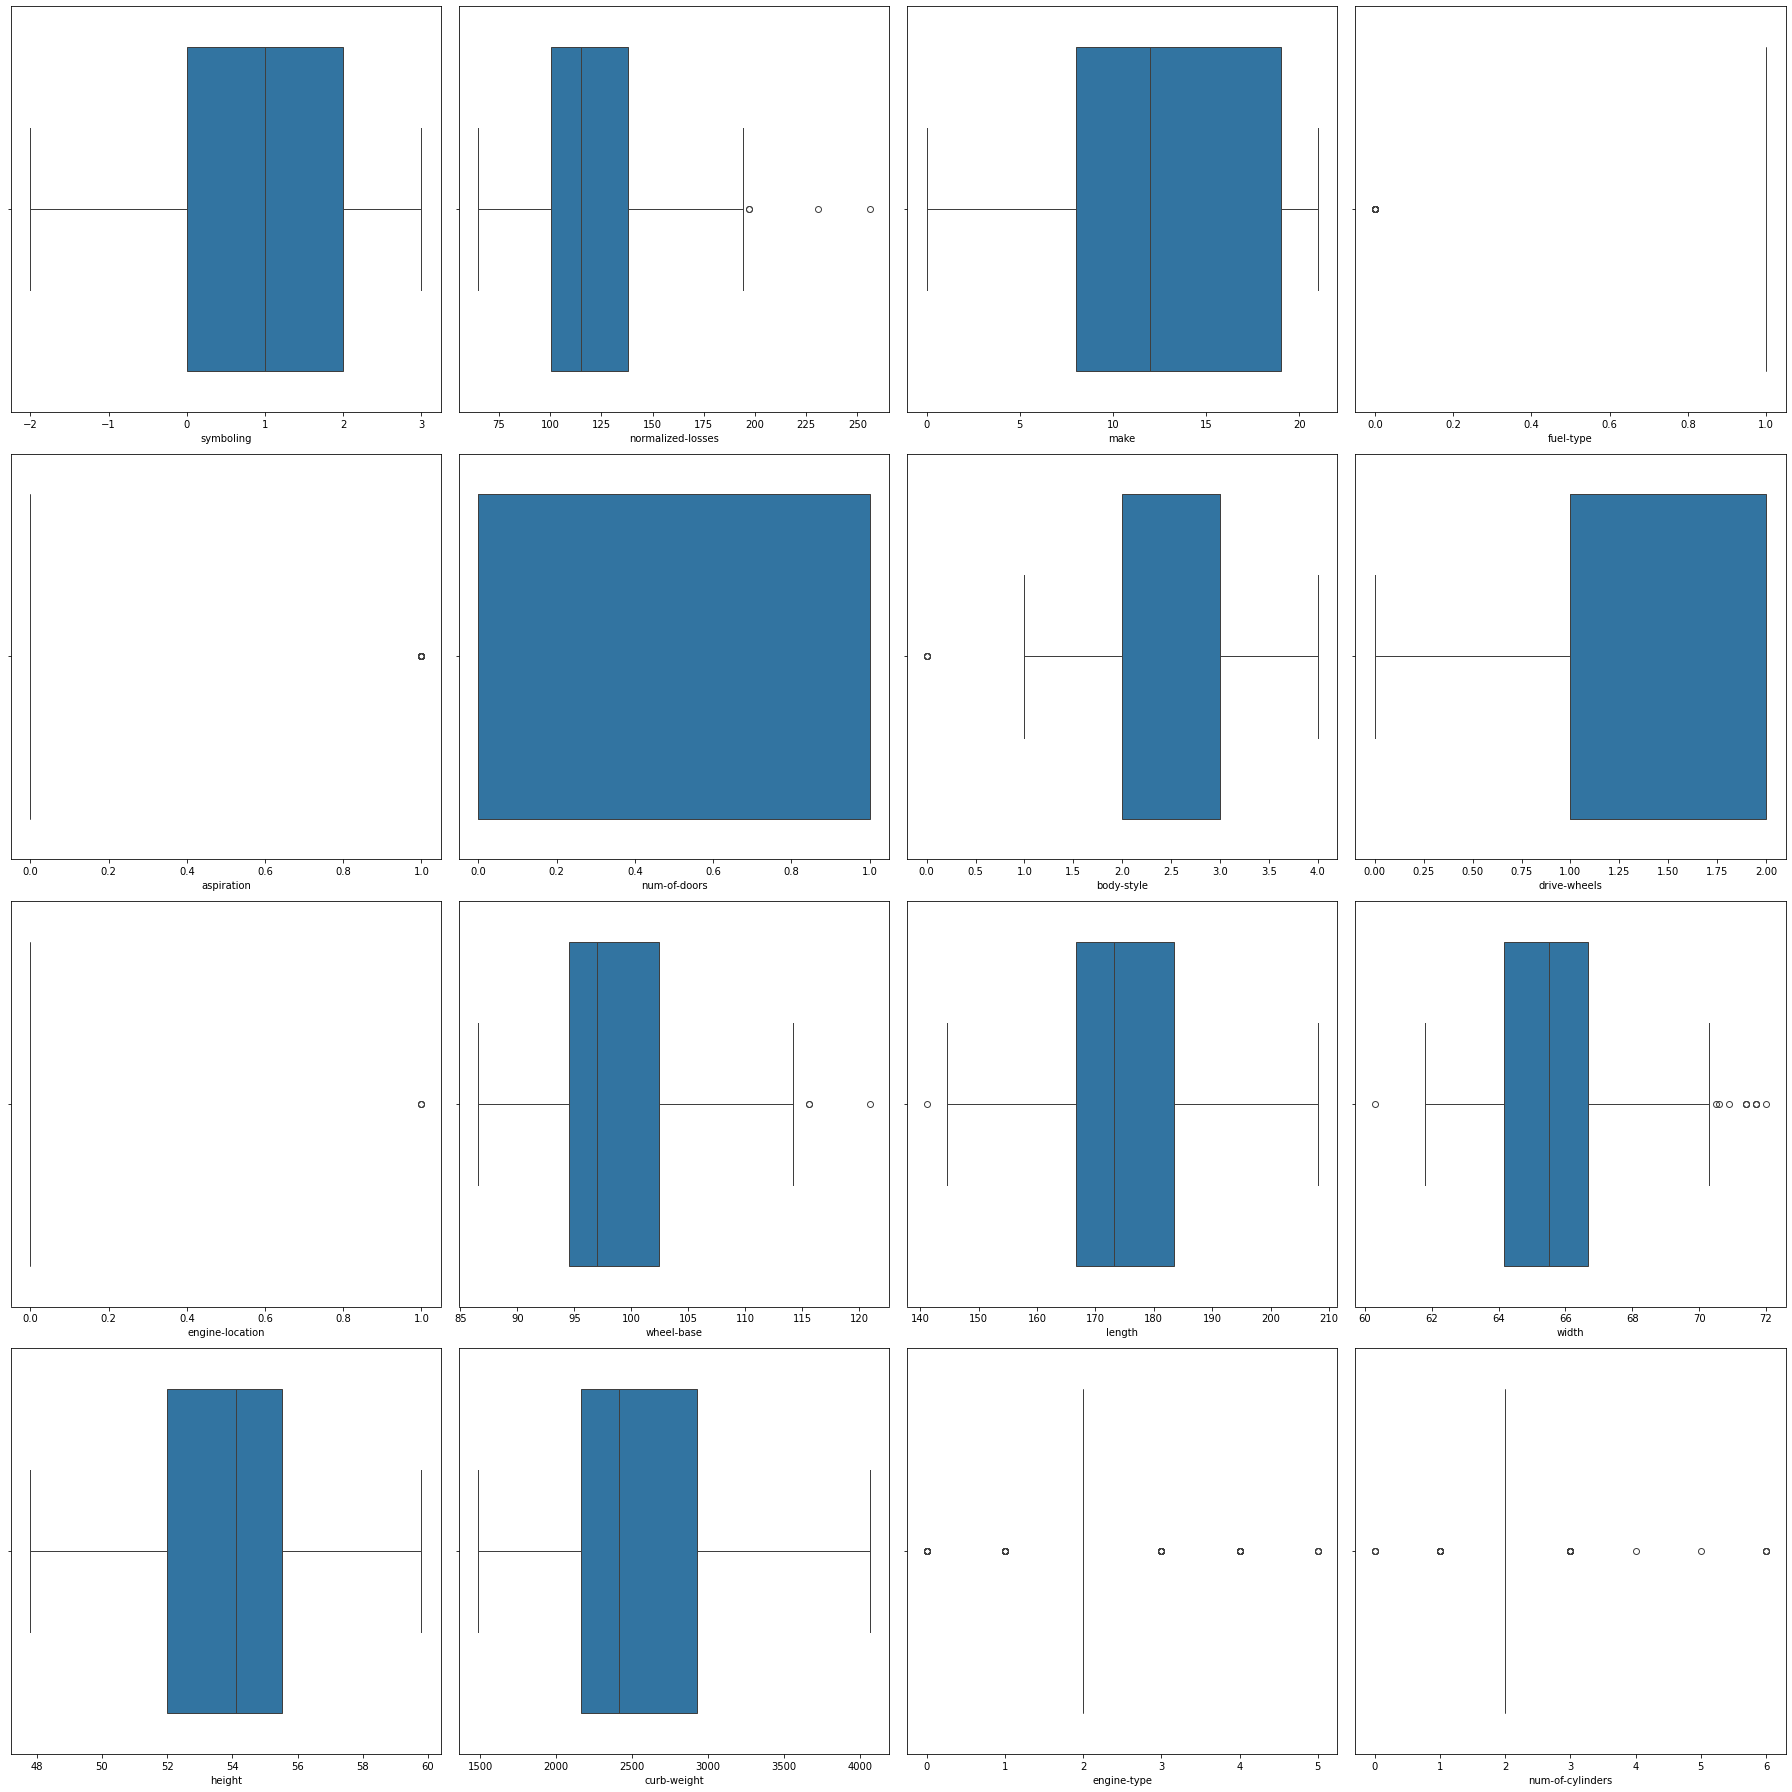

In [47]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber = 1
for column in df_num1:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(x=df_num1[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

In [48]:
Q1 = df_num1.quantile(0.25)
Q3 = df_num1.quantile(0.75)
IQR = Q3-Q1
min_value = Q1-1.5*IQR
max_value = Q3+1.5*IQR
outliers_count = ((df_num1>max_value) | (df_num1<min_value)).sum()
outliers_percentage = (outliers_count/len(df_num1))*100
print('\n Sum of outliers:\n',outliers_count)
print('\n Percentage of outliers:\n',outliers_percentage)


 Sum of outliers:
 symboling             0
normalized-losses     4
make                  0
fuel-type            20
aspiration           36
num-of-doors          0
body-style            5
drive-wheels          0
engine-location       3
wheel-base            3
length                1
width                11
height                0
curb-weight           0
engine-type          55
num-of-cylinders     44
engine-size          10
fuel-system           0
bore                  0
stroke               24
compression-ratio    27
horsepower            5
peak-rpm              2
city-mpg              2
highway-mpg           3
price                14
dtype: int64

 Percentage of outliers:
 symboling             0.0
normalized-losses     2.0
make                  0.0
fuel-type            10.0
aspiration           18.0
num-of-doors          0.0
body-style            2.5
drive-wheels          0.0
engine-location       1.5
wheel-base            1.5
length                0.5
width                 5.5
heig

In [49]:

Q1 = df["wheel-base"].quantile(0.25)
Q3 = df["wheel-base"].quantile(0.75)
IQR = Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

df.loc[(df["wheel-base"] < min_limit) | (df["wheel-base"] > max_limit), "wheel-base"] = df["wheel-base"].apply(lambda x: min_limit if x < min_limit else max_limit)

In [50]:

Q1 = df.length.quantile(0.25)
Q3 = df.length.quantile(0.75)
IQR = Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

df.loc[(df.length < min_limit) | (df.length > max_limit), "length"] = df.length.apply(lambda x: min_limit if x < min_limit else max_limit)

In [51]:

Q1 = df.width.quantile(0.25)
Q3 = df.width.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR
median_value = df.width.median()
df.loc[(df.width < min_limit) | (df.width > max_limit), "width"] = median_value

In [52]:
# Calculate Q1, Q3, and IQR for the 'engine-size' column in the df dataset
Q1 = df["engine-size"].quantile(0.25)
Q3 = df["engine-size"].quantile(0.75)
IQR = Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR
median_value = df["engine-size"].median()
df.loc[(df["engine-size"] < min_limit) | (df["engine-size"] > max_limit), "engine-size"] = median_value

In [53]:
# Calculate Q1, Q3, and IQR for the 'highway-mpg' column in the df dataset
Q1 = df["highway-mpg"].quantile(0.25)
Q3 = df["highway-mpg"].quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR
median_value = df["highway-mpg"].median()
df.loc[(df["highway-mpg"] < min_limit) | (df["highway-mpg"] > max_limit), "highway-mpg"] = median_value

In [54]:
# Calculate Q1, Q3, and IQR for the 'city-mpg' column in the df dataset
Q1 = df["city-mpg"].quantile(0.25)
Q3 = df["city-mpg"].quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR
median_value = df["city-mpg"].median()
df.loc[(df["city-mpg"] < min_limit) | (df["city-mpg"] > max_limit), "city-mpg"] = median_value

Insights:
The IQR is used to identify potential outliers in the fare data. Observations that fall below the first quartile (Q1 - 1.5 * IQR) or above the third quartile (Q3 + 1.5 * IQR) are considered outliers. These outliers may represent unusually high or low fare prices that deviate significantly from the typical range.
I have use IQR Trimming method to handle outliers.

# Splitting the data

In [55]:
df

symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0            3                115     0          1           0             1   
1            1                115     0          1           0             1   
2            2                164     1          1           0             0   
3            2                164     1          1           0             0   
4            2                115     1          1           0             1   
..         ...                ...   ...        ...         ...           ...   
195         -1                 95    21          1           0             0   
196         -1                 95    21          1           1             0   
197         -1                 95    21          1           0             0   
198         -1                 95    21          0           1             0   
199         -1                 95    21          1           1             0   

     body-style  drive-wheels  engine-location  wheel-base  length  width  \
0             0             2                0        88.6   168.8   64.1   
1             2             2                0        94.5   171.2   65.5   
2             3             1                0        99.8   176.6   66.2   
3             3             0                0        99.4   176.6   66.4   
4             3             1                0        99.8   177.3   66.3   
..          ...           ...              ...         ...     ...    ...   
195           3             2                0       109.1   188.8   68.9   
196           3             2                0       109.1   188.8   68.8   
197           3             2                0       109.1   188.8   68.9   
198           3             2                0       109.1   188.8   68.9   
199           3             2                0       109.1   188.8   68.9   

     height  curb-weight  engine-type  num-of-cylinders  engine-size  \
0      48.8         2548            0                 2        130.0   
1      52.4         2823            4                 3        152.0   
2      54.3         2337            2                 2        109.0   
3      54.3         2824            2                 1        136.0   
4      53.1         2507            2                 1        136.0   
..      ...          ...          ...               ...          ...   
195    55.5         2952            2                 2        141.0   
196    55.5         3049            2                 2        141.0   
197    55.5         3012            4                 3        173.0   
198    55.5         3217            2                 3        145.0   
199    55.5         3062            2                 2        141.0   

     fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0              5  3.47    2.68                9.0         111      5000   
1              5  2.68    3.47                9.0         154      5000   
2              5  3.19    3.40               10.0         102      5500   
3              5  3.19    3.40                8.0         115      5500   
4              5  3.19    3.40                8.5         110      5500   
..           ...   ...     ...                ...         ...       ...   
195            5  3.78    3.15                9.5         114      5400   
196            5  3.78    3.15                8.7         160      5300   
197            5  3.58    2.87                8.8         134      5500   
198            3  3.01    3.40               23.0         106      4800   
199            5  3.78    3.15                9.5         114      5400   

     city-mpg  highway-mpg  price  
0          21           27  16500  
1          19           26  16500  
2          24           30  13950  
3          18           22  17450  
4          19           25  15250  
..        ...          ...    ...  
195        23           28  16845  
196        19           25  19045  
197        18           23  2

In [56]:
x=df.drop('price',axis=1)
y=df.price

In [57]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Model Implementation

# Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

LinearRegression()

In [59]:
y_pred_linear=model_linear.predict(x_test)

In [60]:
y_pred_linear

array([ 9915.04916127, 31782.42292185,  7130.97208029,  7496.57366004,
       14111.25004028,  7108.59450565, 43046.95192822, 11359.03848107,
       17000.23028734, 47802.35939439, 25700.81094422, 10621.71240563,
       14230.34102249, 12464.31793577, 12868.35116601,  9785.8945048 ,
       10070.79873787,  6768.65658858,  9039.44469075, 36083.24232143,
       34114.87222211,  1779.46890469,  6010.74679761,  5615.26325975,
       24215.82114129, 10714.43853377, 12599.07457514, 37915.04059152,
        8758.29549748, 18131.31616503, 15113.79332728,  7215.2845387 ,
       10335.83579802,  8025.37480983, 11261.24614175, 16874.93502213,
        6942.34878448, 10225.18516926, 12833.7610831 , 10117.29189059])

In [61]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [62]:
r2_score(y_test,y_pred_linear)

0.9234115506357172

In [63]:
mae_l = mean_absolute_error(y_test,y_pred_linear)
mae_l

2066.130558006506

In [64]:
mean_squared_error(y_test,y_pred_linear)

8581598.230532113

# SVM

In [65]:
from sklearn.svm import SVR
model_svr=SVR(kernel="linear")
model_svr.fit(x_train,y_train)

SVR(kernel='linear')

In [66]:
y_pred_svr=model_svr.predict(x_test)

In [67]:
y_pred_svr

array([ 9873.0896059 , 25884.08776724,  5546.20664648,  7938.69019517,
       13491.40362223,  8766.93673316, 29432.62520394, 10059.47060175,
       17225.75420411, 33830.85400324, 22534.182018  ,  9809.27100996,
       12605.51621765, 15177.64359222, 11940.87736385,  8450.67466052,
       10460.82720189,  6908.75499466, 10106.77394456, 25025.74458465,
       16015.65810931,  2957.61078745,  8138.98319323,  6864.6836709 ,
       19843.23360352, 10592.84718596, 12049.81000312, 26156.07903772,
       11135.81172676, 17496.91479845, 12472.38432033,  6501.07654876,
       10346.9622465 ,  9450.52150694, 14795.64838875, 17526.86858774,
        7658.92213965,  8366.58055576, 11572.50482398, 11904.47819174])

# Model Evaluation

In [68]:
r2_score(y_test,y_pred_svr)

0.7440620541678071

In [69]:
mae_svr = mean_absolute_error(y_test,y_pred_svr)
mae_svr

3237.533880286669

# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor(random_state=2) 
model_dt.fit(x_train,y_train)
y_pred_dt=model_dt.predict(x_test)
y_pred_dt

array([ 9549., 35550.,  5572.,  8238., 15510.,  7957., 45400., 11248.,
       16558., 45400., 15690., 11395., 11549., 12764., 12290.,  7995.,
       10245.,  7799.,  6989., 14489., 33278.,  6479.,  7898.,  7349.,
       25552., 10595.,  9279., 16695., 11850., 18420., 16430.,  6295.,
       10595.,  7957., 18344., 17425.,  7898.,  7898.,  8449.,  9279.])

In [71]:
r2_score(y_test,y_pred_dt)

0.7184633690609572

In [72]:
mae_dt = mean_absolute_error(y_test,y_pred_dt)
mae_dt

2859.225

# Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbm=GradientBoostingRegressor()
model_gbm.fit(x_train,y_train)
y_pred_gbm=model_gbm.predict(x_test)
y_pred_gbm

array([ 9157.20446038, 35291.71037341,  6172.59070253,  8063.79628056,
       15071.90880431,  8629.38867512, 39260.24714835, 10795.68983724,
       16559.43266956, 40094.60217225, 23427.71906299,  8498.02017075,
       12920.2849253 , 13783.28300234, 13501.93891667,  8082.69422708,
       10200.24839399,  7473.88195197,  8390.95829959, 19763.52803575,
       32959.22404525,  6479.14597493,  7349.65785207,  7336.264734  ,
       22714.7685294 , 10200.24839399,  9418.41025083, 23046.06930454,
       11378.38143081, 17536.84114124, 16069.88583153,  6279.36329758,
       10220.17885699,  8628.15056251, 13749.75645657, 17118.95992168,
        7289.60626941,  7893.41311095, 10550.11123097,  9797.13918842])

In [74]:
r2_score(y_test,y_pred_gbm)

0.8738652786965972

In [75]:
mae_gb = mean_absolute_error(y_test,y_pred_gbm)
mae_gb

2107.510836014145

# XGB

In [76]:
#pip install xgboost

In [77]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor(n_estimators=100)
model_xgb.fit(x_train,y_train)
y_pred_xgb=model_xgb.predict(x_test)
y_pred_xgb

array([ 9921.649 , 37658.69  ,  5941.4136,  8266.301 , 15352.309 ,
        7985.8525, 41730.312 , 11000.06  , 16483.79  , 40500.08  ,
       17515.154 ,  9487.906 , 12829.441 , 14387.3545, 12566.081 ,
        7870.2964, 10250.673 ,  7679.751 ,  7921.738 , 21464.926 ,
       33529.68  ,  7134.045 ,  7644.1475,  7522.9526, 25330.305 ,
       10307.175 ,  9413.849 , 20536.064 , 11584.808 , 18246.033 ,
       15589.874 ,  6581.31  , 10591.991 ,  7976.533 , 14862.089 ,
       17527.266 ,  7169.25  ,  7620.946 ,  8881.352 ,  9158.242 ],
      dtype=float32)

In [78]:
r2_score(y_test,y_pred_xgb)

0.8422092199325562

In [79]:
mae_xgb = mean_absolute_error(y_test,y_pred_xgb)
mae_xgb

2251.9832763671875

# Bagging

In [80]:
from sklearn.ensemble import BaggingRegressor
model_bag=BaggingRegressor(estimator=model_gbm,n_estimators=20)
model_bag.fit(x_train,y_train)


BaggingRegressor(estimator=GradientBoostingRegressor(), n_estimators=20)

In [81]:
y_pred_bag=model_bag.predict(x_test)

# Model Evaluation

In [82]:
r2_score(y_test,y_pred_bag)

0.9082309910815406

In [83]:
mae_b = mean_absolute_error(y_test,y_pred_bag)
mae_b

1902.0680930765732

# Lasso

In [84]:
from sklearn.linear_model import Lasso,Ridge

In [85]:
lasso_model = Lasso(alpha=2.2)
# Fit the model to the training data
lasso_model.fit(x_train, y_train)
# Make predictions on the test data
y_pred_lasso = lasso_model.predict(x_test)

In [86]:
r2_score(y_test,y_pred_lasso)

0.9265340513583995

In [87]:
mae_la = mean_absolute_error(y_test,y_pred_lasso)
mae_la

2037.9742880251506

# Ridge

In [88]:
ridge_model = Ridge(alpha=0.011)
# Fit the model to the training data
ridge_model.fit(x_train, y_train)
# Make predictions on the test data
y_pred_ridge = ridge_model.predict(x_test)

In [89]:
r2_score(y_test,y_pred_ridge)

0.924726685952573

In [90]:
mae_rid = mean_absolute_error(y_test,y_pred_ridge)
mae_rid

2055.977491680604

# Hyperparameter Tuning

In [91]:
gbr = GradientBoostingRegressor()
# Define the parameter grid
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
 'n_estimators': [100, 200, 300],
 'learning_rate': [0.001, 0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5, 6],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'subsample': [0.8, 0.9, 1.0]
}
# Set up the grid search with cross-validation
random_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the model
random_search.fit(x_train, y_train)
# Get the best parameters
best_params = random_search.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [92]:
print(f"Best parameters found: {best_params}")

Best parameters found: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.2}


In [93]:
best_gbr = GradientBoostingRegressor(**best_params)
best_gbr.fit(x_train, y_train)
# Make predictions on the test data
y_pred_gbrhyper = best_gbr.predict(x_test)

In [94]:
r2_score(y_test,y_pred_gbrhyper)

0.8834576396812379

In [95]:
print("Feature Importances:", best_gbr.feature_importances_)

Feature Importances: [2.84270107e-03 1.01877488e-03 1.39261199e-02 3.11265109e-06
 9.01455510e-04 1.21426654e-02 3.40213422e-03 1.35474132e-03
 0.00000000e+00 1.32506701e-02 5.83502880e-02 1.83157489e-02
 1.35191352e-02 4.85090576e-01 6.23532825e-05 9.88089721e-04
 1.11513713e-02 3.79773181e-04 1.67435727e-03 1.05940319e-02
 1.41584563e-02 3.10581762e-01 4.06191606e-03 1.92335080e-02
 2.99625790e-03]


# Decision Tree

In [96]:
dt_regressor = DecisionTreeRegressor()
# Define the parameter grid
params = {
 "criterion": ["mse", "friedman_mse", "mae"], # function to measure the 
 "splitter": ["best", "random"], # strategy used to choose t
 "max_depth": list(range(1, 20)), # maximum depth of the tree
 "min_samples_split": [2, 3, 4], # minimum number of samples
 "min_samples_leaf": list(range(1, 20)), # minimum number of samples
}
random_search = RandomizedSearchCV(estimator=dt_regressor, 
                                   param_distributions=params, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the grid search to the training data
random_search.fit(x_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 11, 'criterion': 'friedman_mse'}


In [97]:
best_dt = DecisionTreeRegressor(**best_params)
best_dt.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11, splitter='random')

In [98]:
y_pred_dthyper = best_gbr.predict(x_test)

In [99]:
r2_score(y_test,y_pred_dthyper)

0.8834576396812379

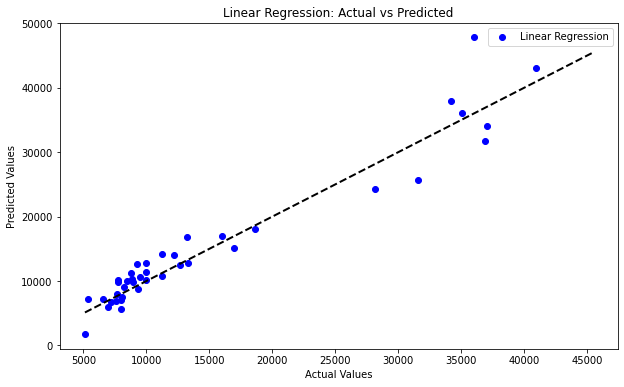

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.plot([y.min(),y.max()],[y.min(),y.max()],"k--",lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()


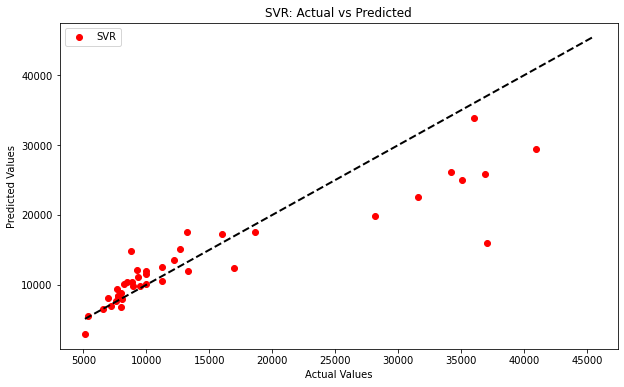

In [101]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='red', label='SVR')
plt.plot([y.min(),y.max()],[y.min(),y.max()],"k--",lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted')
plt.legend()
plt.show()


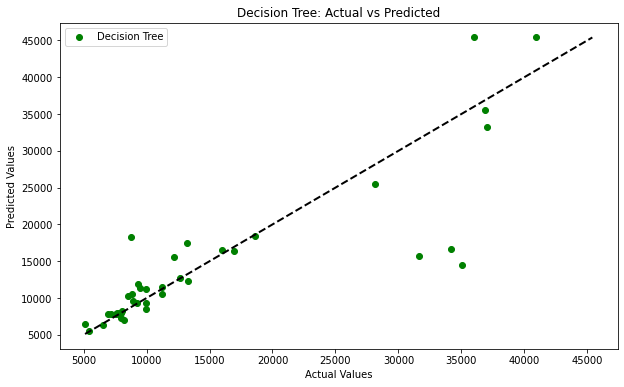

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='green', label='Decision Tree')
plt.plot([y.min(),y.max()],[y.min(),y.max()],"k--",lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted')
plt.legend()
plt.show()


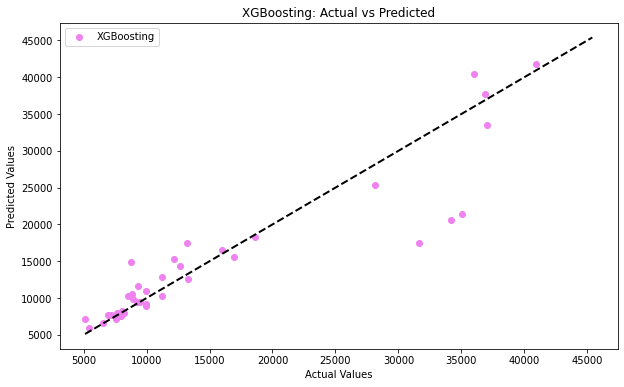

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='violet', label='XGBoosting')
plt.plot([y.min(),y.max()],[y.min(),y.max()],"k--",lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoosting: Actual vs Predicted')
plt.legend()
plt.show()


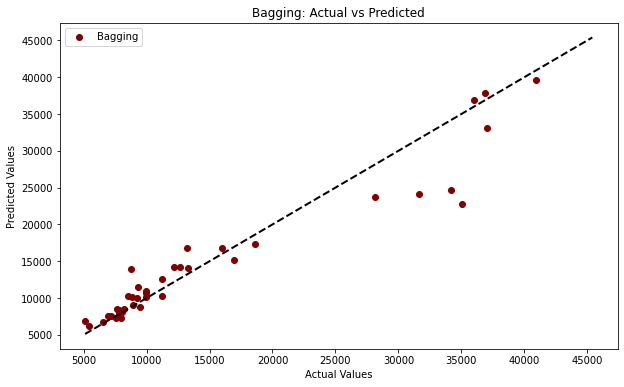

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bag, color='maroon', label='Bagging')
plt.plot([y.min(),y.max()],[y.min(),y.max()],"k--",lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Bagging: Actual vs Predicted')
plt.legend()
plt.show()


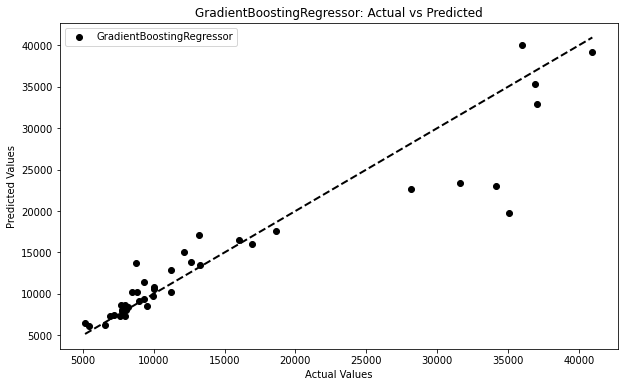

In [105]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbm, color='black', label='GradientBoostingRegressor')  # corrected line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)  # line showing the perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('GradientBoostingRegressor: Actual vs Predicted')
plt.legend()
plt.show()


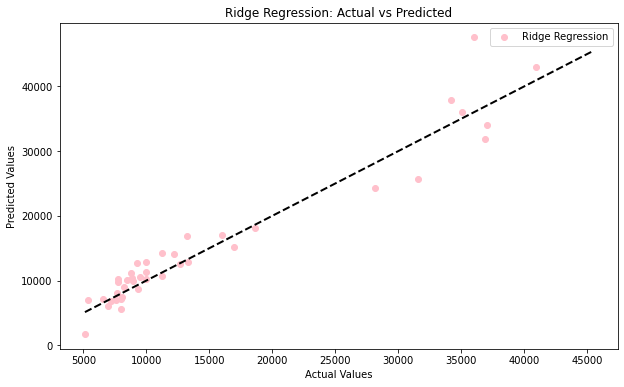

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='pink', label='Ridge Regression')
plt.plot([y.min(),y.max()],[y.min(),y.max()],"k--",lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted')
plt.legend()
plt.show()


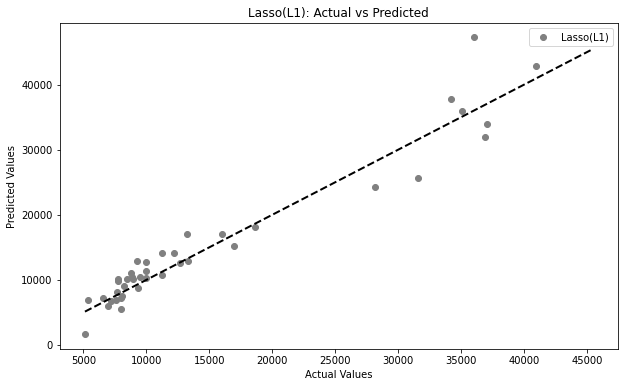

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='grey', label='Lasso(L1)')
plt.plot([y.min(),y.max()],[y.min(),y.max()],"k--",lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso(L1): Actual vs Predicted')
plt.legend()
plt.show()

Model comparison Report 

1) Linear Regression: The Linear Regression model did not yield
good accuracy,indicating poor accuracy and suboptimal
performance
2) Support Vector Regressor: The Support Vector Regression (SVR)
model yielded a low R² score and also did not yield good accuracy.
While Support Vector Machines typically perform well with nonlinear data, SVR did not perform well in this instance.
3) Decision Tree : The Decision Tree model demonstrated good
accuracy in predicting car prices. Although Decision Trees are prone
to overfitting, this issue was well-managed in this case, resulting in
minimal overfitting.
4) Bagging : Bagging demonstrates strong performance compared
to the previous models, yielding favorable accuracy results.


# Challenges Faced Report
A smaller dataset containing only 200 rows can contribute to model
overfitting or inaccurate predictions, thereby compromising the
efficacy of car price prediction models.
Identifying unknown values represented by "?" in the dataset
proved to be a challenging and laborious task. This process
required extensive effort and attention to detail, as these unknown
values could potentially introduce errors or inaccuracies into the
analysis.
Due to the dataset's limited size and absence of make, model year,
and sale price year, the analysis faced challenges in extracting
meaningful insights.
Hyperparameter tuning proved to be a demanding endeavor,
requiring thorough adjustment of parameters tailored to each
model to enhance accuracy.
Conclusion
The strong performance of Gradient Bossting model suggests they
are well-suited for this task, likely due to their ability to handle nonlinear relationships and interactions within the dataset. This
highlights their robustness and potential for delivering reliable
predictions in similar applications.
Automobile car price prediction encounters various challenges,
spanning from data quality and availability to the intricate
dynamics of pricing and vehicle specifications.
Effectively tackling these hurdles demands a comprehensive
approach, integrating collaborative data efforts, advanced
modeling methodologies, and domain expertise